# Introduction

### **Fuel Econmy**

This project involves training machine learning models to predict the fuel economy of various vehicle brands based on key metrics.

Fuel economy is an important consideration for consumers when purchasing a vehicle, and it is often used as a standard 
metric for comparing the efficiency of different cars, trucks, and other vehicles. It is a measurement of how many mile 
or kilometers a vehicle can travel on a specific amount of fuel.It is influenced by various factors, including th 
vehicle's engine efficiency, weight, vehicle category and some other factors. It is measure in "MPG" (miles per gall n)
in the United States or "L/100km" (liters per 100 kilometers) in most countries.

Higher fuel economy means that a vehicle can travel a greater distance on a given amount of fuel, which is typially 
desirable because it leads to cost savings for the vehicle owner and reduces the environmental impact of drivng by 
lowering fuel consumption and emissions.

### **Problem Statement**

Your task is to analyze and model factors influencing vehicle fuel efficiency. The project involves data cleaning, including null value
handling, word consistency, and outlier treatment, followed by visualization and feature engineering to address specific metric questions:

1. **Comparison of Light-Duty Vehicles**: Investigate how light-duty vehicles differ in terms of fuel efficiency.

2. **Fuel Economy by Vehicle Type**: Determine which type of car offers the highest fuel economy.

3. **City vs. Highway Fuel Economy Distribution**: Analyze the distribution of fuel economy in both city and highway conditions.

4. **Performance of Vehicle Divisions**: Assess if there's a significant performance difference in one specific vehicle division compared to others.

5. **Correlation with Continuous Attributes**: Examine the correlation between vehicle specifications and combined fuel economy (FE).

6. **Machine Learning Models for FE Prediction**: Develop machine learning models to predict fuel efficiency based on vehicle data.

7. **Model Performance Optimization**: Explore ways to optimize the performance of the predictive models.

8. **Predictive Variables for Fuel Economy**: Identify the key variables that influence vehicle fuel economy.

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid") 

from sklearn.compose import ColumnTransformer
from collections import OrderedDict
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as R2, mean_squared_error as MSE
import xgboost
from xgboost import XGBRegressor
import catboost
from catboost import CatBoostRegressor
import lightgbm
from lightgbm import LGBMRegressor

## Reading the Datasets

The dataset is a 9-year dataset spanning from 2015 to 2023. It consists of zip file folders downloaded from https://www.fueleconomy.gov/feg/printguides.shtml

In [2]:
df1 = pd.read_csv('Year_2015.csv')
df2 = pd.read_csv('Year_2016.csv')
df3 = pd.read_csv('Year_2017.csv')
df4 = pd.read_csv('Year_2018.csv')
df5 = pd.read_csv('Year_2019.csv')
df6 = pd.read_csv('Year_2020.csv', encoding='latin1')
df7 = pd.read_csv('Year_2021.csv', encoding='latin1')
df8 = pd.read_csv('Year_2022.csv', encoding='latin1')
df9 = pd.read_csv('Year_2023.csv', encoding='latin1')

In [3]:
#Joining the datasets
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], ignore_index=True)
df

,Model Year,Mfr Name,Division,Carline,Engine Displacement,Cylinder,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Desc,Gears,Drive Desc,Fuel Usage Desc,Carline Class Desc
0,2015,FCA Italy,Alfa Romeo,4C,1.8,4,Automatic,24,34,28,Turbocharged,Automated Manual,6,"2-Wheel Drive, Rear",Gasoline (Premium Unleaded Recommended),Two Seaters
1,2015,aston martin,Aston Martin Lagonda Ltd,V12 Vantage S,6.0,12,Automatic,12,18,14,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Gasoline (Premium Unleaded Recommended),Two Seaters
2,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Automatic,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Gasoline (Premium Unleaded Recommended),Two Seaters
3,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Gasoline (Premium Unleaded Recommended),Two Seaters
4,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Automatic,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Gasoline (Premium Unleaded Recommended),Two Seaters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10917,2023,General Motors,Chevrolet,COLORADO 4WD MUD TERRAIN TIRES,2.7,4,Auto(A8),17,19,18,Turbocharged,Automatic,8,4-Wheel Drive,Gasoline (Regular Unleaded Recommended),Small Pick-up Trucks 4WD
10918,2023,General Motors,GMC,CANYON 4WD,2.7,4,Auto(A8),17,21,19,Turbocharged,Automatic,8,4-Wheel Drive,Gasoline (Regular Unleaded Recommended),Small Pick-up Trucks 4WD
10919,2023,General Motors,GMC,CANYON 4WD MUD TERRAIN TIRES,2.7,4,Auto(A8),17,20,18,Turbocharged,Automatic,8,4-Wheel Drive,Gasoline (Regular Unleaded Recommended),Small Pick-up Trucks 4WD
10920,2023,FCA US LLC,RAM,1500 4X2,5.7,8,Auto(A8),15,22,17,Naturally Aspirated,Automatic,8,"2-Wheel Drive, Rear",Gasoline (Mid Grade Unleaded Recommended),Standard Pick-up Trucks 2WD


## General Dataset Verification

In [4]:
#check for column names
df.columns

Index(['Model Year', 'Mfr Name', 'Division', 'Carline', 'Engine Displacement',
       'Cylinder', 'Transmission', 'City FE ', 'Highway FE', 'Combined FE',
       'Air Aspiration Method', 'Transmission Desc', 'Gears', 'Drive Desc',
       'Fuel Usage Desc', 'Carline Class Desc'],
      dtype='object')

In [5]:
# Replace white space with _ to make calling variable name easier
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Model_Year', 'Mfr_Name', 'Division', 'Carline', 'Engine_Displacement',
       'Cylinder', 'Transmission', 'City_FE', 'Highway_FE', 'Combined_FE',
       'Air_Aspiration_Method', 'Transmission_Desc', 'Gears', 'Drive_Desc',
       'Fuel_Usage_Desc', 'Carline_Class_Desc'],
      dtype='object')

### Converting Fuel Economy from mile per gallon to kilometer per liter
The Dataset is in miles per gallon, we need to convert it to kilometer per liter for better understanding of layman

In [6]:
#converting miles per gallon(mpg) to kilometer per liter (kpl)
#mile = 1.609344 kilometers
#gallon = 3.78541178 liter
#Therefore, kpl = 1.609344/3.78541178
#kpl = 0.42514
df['City_FE'] = (df['City_FE']*0.42514).round(4)
df['Highway_FE'] = (df['Highway_FE']*0.42514).round(4)
df['Combined_FE'] = (df['Combined_FE']*0.42514).round(4)
df

,Model_Year,Mfr_Name,Division,Carline,Engine_Displacement,Cylinder,Transmission,City_FE,Highway_FE,Combined_FE,Air_Aspiration_Method,Transmission_Desc,Gears,Drive_Desc,Fuel_Usage_Desc,Carline_Class_Desc
0,2015,FCA Italy,Alfa Romeo,4C,1.8,4,Automatic,10.2034,14.4548,11.9039,Turbocharged,Automated Manual,6,"2-Wheel Drive, Rear",Gasoline (Premium Unleaded Recommended),Two Seaters
1,2015,aston martin,Aston Martin Lagonda Ltd,V12 Vantage S,6.0,12,Automatic,5.1017,7.6525,5.9520,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Gasoline (Premium Unleaded Recommended),Two Seaters
2,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Automatic,5.9520,8.9279,6.8022,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Gasoline (Premium Unleaded Recommended),Two Seaters
3,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Manual,5.5268,8.0777,6.3771,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Gasoline (Premium Unleaded Recommended),Two Seaters
4,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Automatic,5.9520,8.9279,6.8022,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Gasoline (Premium Unleaded Recommended),Two Seaters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10917,2023,General Motors,Chevrolet,COLORADO 4WD MUD TERRAIN TIRES,2.7,4,Auto(A8),7.2274,8.0777,7.6525,Turbocharged,Automatic,8,4-Wheel Drive,Gasoline (Regular Unleaded Recommended),Small Pick-up Trucks 4WD
10918,2023,General Motors,GMC,CANYON 4WD,2.7,4,Auto(A8),7.2274,8.9279,8.0777,Turbocharged,Automatic,8,4-Wheel Drive,Gasoline (Regular Unleaded Recommended),Small Pick-up Trucks 4WD
10919,2023,General Motors,GMC,CANYON 4WD MUD TERRAIN TIRES,2.7,4,Auto(A8),7.2274,8.5028,7.6525,Turbocharged,Automatic,8,4-Wheel Drive,Gasoline (Regular Unleaded Recommended),Small Pick-up Trucks 4WD
10920,2023,FCA US LLC,RAM,1500 4X2,5.7,8,Auto(A8),6.3771,9.3531,7.2274,Naturally Aspirated,Automatic,8,"2-Wheel Drive, Rear",Gasoline (Mid Grade Unleaded Recommended),Standard Pick-up Trucks 2WD


In [7]:
# Check for missing values
df.isna().sum().sum()

0

In [8]:
#check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10922 entries, 0 to 10921
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Model_Year             10922 non-null  int64  
 1   Mfr_Name               10922 non-null  object 
 2   Division               10922 non-null  object 
 3   Carline                10922 non-null  object 
 4   Engine_Displacement    10922 non-null  float64
 5   Cylinder               10922 non-null  int64  
 6   Transmission           10922 non-null  object 
 7   City_FE                10922 non-null  float64
 8   Highway_FE             10922 non-null  float64
 9   Combined_FE            10922 non-null  float64
 10  Air_Aspiration_Method  10922 non-null  object 
 11  Transmission_Desc      10922 non-null  object 
 12  Gears                  10922 non-null  int64  
 13  Drive_Desc             10922 non-null  object 
 14  Fuel_Usage_Desc        10922 non-null  object 
 15  Ca

In [9]:
#check for basic statistics of numerical columns
df.describe()

,Model_Year,Engine_Displacement,Cylinder,City_FE,Highway_FE,Combined_FE,Gears
count,10922.000000,10922.000000,10922.000000,10922.000000,10922.000000,10922.000000,10922.000000
mean,2018.920894,3.141860,5.623695,8.745809,11.688314,9.835401,7.108771
std,2.560139,1.336026,1.866710,2.577697,2.632703,2.556257,1.783974
min,2015.000000,0.900000,3.000000,3.401100,4.676500,3.826300,1.000000
25%,2017.000000,2.000000,4.000000,7.227400,9.778200,8.077700,6.000000
50%,2019.000000,3.000000,6.000000,8.502800,11.478800,9.353100,7.000000
75%,2021.000000,3.700000,6.000000,9.778200,13.179300,11.053600,8.000000
max,2023.000000,8.400000,16.000000,24.658100,25.508400,25.083300,10.000000


## Categorical columns cleaning

In [10]:
#Separate the columns into numerical and categorical data types
num_cols = [col for col in df.columns if df[col].dtype != 'O']
cat_cols = [col for col in df.columns if df[col].dtype == 'O']

In [11]:
print(num_cols)
print(cat_cols)

['Model_Year', 'Engine_Displacement', 'Cylinder', 'City_FE', 'Highway_FE', 'Combined_FE', 'Gears']
['Mfr_Name', 'Division', 'Carline', 'Transmission', 'Air_Aspiration_Method', 'Transmission_Desc', 'Drive_Desc', 'Fuel_Usage_Desc', 'Carline_Class_Desc']


In [12]:
#checking for words consistent and cardinality reduction in categorical columns
for i in cat_cols:
    print('The cardinality of categorical variable {} is {} categories'.format(i, df[i].nunique()))

The cardinality of categorical variable Mfr_Name is 32 categories
The cardinality of categorical variable Division is 55 categories
The cardinality of categorical variable Carline is 2035 categories
The cardinality of categorical variable Transmission is 34 categories
The cardinality of categorical variable Air_Aspiration_Method is 5 categories
The cardinality of categorical variable Transmission_Desc is 7 categories
The cardinality of categorical variable Drive_Desc is 5 categories
The cardinality of categorical variable Fuel_Usage_Desc is 7 categories
The cardinality of categorical variable Carline_Class_Desc is 23 categories


In [13]:
#Deleting space before and after each word in categorical variables to ensure words consistency.
for i in cat_cols:
    df[i] = df[i].str.strip()

### Preventing Duplication of words in Mfr_Name

In [14]:
df.Mfr_Name.unique()

array(['FCA Italy', 'aston martin', 'Volkswagen Group of', 'BMW',
       'General Motors', 'FCA US LLC', 'Ferrari', 'Honda',
       'Jaguar Land Rover L', 'MAZDA', 'McLaren Automotive',
       'Mercedes-Benz', 'Nissan', 'Porsche', 'Toyota', 'Subaru',
       'Ford Motor Company', 'Hyundai', 'Maserati', 'Kia',
       'Mitsubishi Motors Co', 'Rolls-Royce', 'Volvo',
       'Quantum Fuel System', 'Roush', 'Mobility Ventures L',
       'Pagani Automobili S', 'Lotus', 'Koenigsegg', 'RUF',
       'SUBARU TECNICA INTE'], dtype=object)

In [15]:
df.Mfr_Name.nunique()

31

In [16]:
df['Mfr_Name'] = df['Mfr_Name'].replace({'Volkswagen Group of':'Volkswagen Group', 'FCA Italy':'FCA US LLC', 
                'SUBARU TECNICA INTE': 'Subaru', 'Mobility Ventures L': 'Mobility Ventures LLC', 
                'Pagani Automobili S': 'Pagani Automobili'})                                         

In [17]:
df.Mfr_Name.nunique()

29

### Preventing Duplication of words in car Divisions

In [18]:
df.Division.unique()

array(['Alfa Romeo', 'Aston Martin Lagonda Ltd', 'Audi', 'Bentley', 'BMW',
       'Bugatti', 'Chevrolet', 'Dodge', 'Ferrari North America, Inc.',
       'Honda', 'Jaguar', 'Lamborghini', 'MAZDA',
       'McLaren Automotive Limted', 'Mercedes-Benz', 'Mini', 'NISSAN',
       'Porsche', 'FIAT', 'SCION', 'Subaru', 'Ford',
       'HYUNDAI MOTOR COMPANY', 'INFINITI', 'LEXUS', 'MASERATI',
       'Volkswagen', 'Acura', 'Buick', 'Cadillac',
       'KIA MOTORS CORPORATION', 'Mitsubishi Motors Corporation',
       'Rolls-Royce Motor Cars Limited', 'TOYOTA',
       'Volvo Cars of North America, LLC', 'Chrysler', 'Lincoln', 'GMC',
       'RAM', 'CHEVROLET', 'Jeep', 'Land Rover', 'Roush Industries, Inc.',
       'Mobility Ventures LLC', 'ALFA ROMEO', 'McLaren',
       'Pagani Automobili S.p.A.', 'Lotus Cars Ltd', 'GENESIS',
       'Koenigsegg Automotive AG', 'RUF Automobile GmbH',
       'SUBARU TECNICA INTERNATIONAL', 'Certification', 'KIA',
       'MITSUBISHI MOTORS'], dtype=object)

In [19]:
len(df.Division.unique())

55

In [20]:
df['Division'] = df['Division'].replace({'Aston Martin Lagonda Ltd':'Aston Martin', 'Ferrari North America, Inc.':'Ferrari', 
            'McLaren Automotive Limted':'McLaren','HYUNDAI MOTOR COMPANY':'Hyundai', 'KIA MOTORS CORPORATION':'KIA', 
            'Mitsubishi Motors Corporation':'Mitsubishi', 'Rolls-Royce Motor Cars Limited':'Rolls-Royce',
            'Volvo Cars of North America, LLC':'Volvo', 'Roush Industries, Inc.':'Roush', 'Mobility Ventures LLC':'Mobility',
            'ALFA ROMEO':'Alfa Romeo', 'Pagani Automobili S.p.A.':'Pagani',  'Lotus Cars Ltd': 'Lotus', 
            'Koenigsegg Automotive AG':'Koenigsegg', 'RUF Automobile GmbH':'RUF', 'SUBARU TECNICA INTERNATIONAL': 'Subaru',
            'Certification':'Pagani', 'MITSUBISHI MOTORS': 'Mitsubishi', 'CHEVROLET':'Chevrolet'})
                    

In [21]:
df.Division.unique()

array(['Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'BMW', 'Bugatti',
       'Chevrolet', 'Dodge', 'Ferrari', 'Honda', 'Jaguar', 'Lamborghini',
       'MAZDA', 'McLaren', 'Mercedes-Benz', 'Mini', 'NISSAN', 'Porsche',
       'FIAT', 'SCION', 'Subaru', 'Ford', 'Hyundai', 'INFINITI', 'LEXUS',
       'MASERATI', 'Volkswagen', 'Acura', 'Buick', 'Cadillac', 'KIA',
       'Mitsubishi', 'Rolls-Royce', 'TOYOTA', 'Volvo', 'Chrysler',
       'Lincoln', 'GMC', 'RAM', 'Jeep', 'Land Rover', 'Roush', 'Mobility',
       'Pagani', 'Lotus', 'GENESIS', 'Koenigsegg', 'RUF'], dtype=object)

In [22]:
df.Division.nunique()

48

### Preventing Duplication of words in car Transmission

In [23]:
df.Transmission.unique()

array(['Automatic', 'Manual', 'Auto(S6)', 'Manual(M5)', 'Auto(A7)',
       'Auto(AM5)', 'Auto(S7)', 'Auto(A6)', 'Auto(AV)', 'Auto(S5)',
       'Auto(AM8)', 'Auto(S9)', 'Auto(AV-S8)', 'Auto(A5)', 'Auto(A9)',
       'Auto(AV-S6)', 'Auto(A4)', 'Auto(A8)', 'Auto(S4)', 'Auto(AM6)',
       'Auto(AM7)', 'Manual(M6)', 'Auto(AM-S6)', 'Auto(AM-S7)',
       'Auto(S8)', 'Manual(M7)', 'Auto(AV-S7)', 'Auto(AM-S8)',
       'Auto(AM-S9)', 'Auto(S10)', 'Auto(A10)', 'Auto(AV-S10)',
       'Auto(A1)', 'Auto(AV-S1)'], dtype=object)

In [24]:
df['Transmission'] = [i[:4] for i in df['Transmission']]
df['Transmission']=df['Transmission'].replace({'Auto':'Automatic', 'Manu':'Manual'})

In [25]:
df.Transmission.unique()

array(['Automatic', 'Manual'], dtype=object)

In [26]:
df.Air_Aspiration_Method.unique()

array(['Turbocharged', 'Naturally Aspirated', 'Supercharged',
       'Turbocharged+Supercharged', 'Other'], dtype=object)

In [27]:
df.Air_Aspiration_Method.value_counts()

Air_Aspiration_Method
Turbocharged                 5581
Naturally Aspirated          4837
Supercharged                  386
Turbocharged+Supercharged      83
Other                          35
Name: count, dtype: int64

In [28]:
df.columns

Index(['Model_Year', 'Mfr_Name', 'Division', 'Carline', 'Engine_Displacement',
       'Cylinder', 'Transmission', 'City_FE', 'Highway_FE', 'Combined_FE',
       'Air_Aspiration_Method', 'Transmission_Desc', 'Gears', 'Drive_Desc',
       'Fuel_Usage_Desc', 'Carline_Class_Desc'],
      dtype='object')

In [29]:
df.Transmission_Desc.value_counts()

Transmission_Desc
Semi-Automatic                                                       4672
Automatic                                                            2666
Manual                                                               1294
Automated Manual- Selectable (e.g. Automated Manual with paddles)     930
Selectable Continuously Variable (e.g. CVT with paddles)              578
Continuously Variable                                                 417
Automated Manual                                                      365
Name: count, dtype: int64

In [30]:
df['Transmission_Desc'] = df['Transmission_Desc'].replace({
                            'Automated Manual- Selectable (e.g. Automated Manual with paddles)':'Automated Manual-Selectable',
                            'Selectable Continuously Variable (e.g. CVT with paddles)':'Selectable Continuously Variable'})               

In [31]:
df['Transmission_Desc'].unique()

array(['Automated Manual', 'Manual', 'Automated Manual-Selectable',
       'Semi-Automatic', 'Selectable Continuously Variable', 'Automatic',
       'Continuously Variable'], dtype=object)

In [32]:
df.columns

Index(['Model_Year', 'Mfr_Name', 'Division', 'Carline', 'Engine_Displacement',
       'Cylinder', 'Transmission', 'City_FE', 'Highway_FE', 'Combined_FE',
       'Air_Aspiration_Method', 'Transmission_Desc', 'Gears', 'Drive_Desc',
       'Fuel_Usage_Desc', 'Carline_Class_Desc'],
      dtype='object')

In [33]:
df.Drive_Desc.value_counts()

Drive_Desc
All Wheel Drive            3215
2-Wheel Drive, Rear        2970
2-Wheel Drive, Front       2910
4-Wheel Drive              1455
Part-time 4-Wheel Drive     372
Name: count, dtype: int64

In [34]:
df.Carline_Class_Desc.unique()

array(['Two Seaters', 'Minicompact Cars', 'Subcompact Cars',
       'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Small Station Wagons', 'Midsize Station Wagons', 'Small SUV 2WD',
       'Small Pick-up Trucks 2WD', 'Small Pick-up Trucks 4WD',
       'Standard Pick-up Trucks 2WD', 'Standard Pick-up Trucks 4WD',
       'Vans, Cargo Types', 'Vans, Passenger Type',
       'Special Purpose Vehicle 2WD', 'Special Purpose Vehicle 4WD',
       'Special Purpose Vehicle cab chassis',
       'Special Purpose Vehicle, minivan 2WD',
       'Special Purpose Vehicle, minivan 4WD', 'Small SUV 4WD',
       'Standard SUV 2WD', 'Standard SUV 4WD'], dtype=object)

In [35]:
# Removing drive descripttion because it is represented as a new variable
df['Carline_Class_Desc'] = df['Carline_Class_Desc'].replace({'Small SUV 2WD': 'Small SUV', 'Small SUV 4WD': 'Small SUV',
                            'Small Pick-up Trucks 2WD':'Small Pick-up Trucks', 'Small Pick-up Trucks 4WD':'Small Pick-up Trucks',
                            'Standard Pick-up Trucks 2WD':'Standard Pick-up Trucks', 'Standard Pick-up Trucks 4WD':'Standard Pick-up Trucks',
                            'Special Purpose Vehicle 2WD':'Special Purpose Vehicle', 'Special Purpose Vehicle 4WD':'Special Purpose Vehicle',
                            'Special Purpose Vehicle, minivan 2WD':'Special Purpose Minivan',
                            'Special Purpose Vehicle, minivan 4WD':'Special Purpose Minivan',
                            'Standard SUV 2WD':'Standard SUV', 'Standard SUV 4WD':'Standard SUV',
                            'Special Purpose Vehicle, minivan':'Special Purpose Minivan',
                            'Vans, Cargo Types':'Vans Cargo Types', 'Vans, Passenger Type': 'Vans Passenger Type'})

In [36]:
df.Carline_Class_Desc.unique()

array(['Two Seaters', 'Minicompact Cars', 'Subcompact Cars',
       'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Small Station Wagons', 'Midsize Station Wagons', 'Small SUV',
       'Small Pick-up Trucks', 'Standard Pick-up Trucks',
       'Vans Cargo Types', 'Vans Passenger Type',
       'Special Purpose Vehicle', 'Special Purpose Vehicle cab chassis',
       'Special Purpose Minivan', 'Standard SUV'], dtype=object)

In [37]:
df.Fuel_Usage_Desc.unique()

array(['Gasoline (Premium Unleaded Recommended)',
       'Gasoline (Premium Unleaded Required)',
       'Gasoline (Regular Unleaded Recommended)',
       'Diesel, ultra low sulfur (15 ppm, maximum)',
       'Compressed Natural Gas',
       'Gasoline (Mid Grade Unleaded Recommended)',
       'Diesel, low sulfur (500 ppm)'], dtype=object)

In [38]:
def categorize_fuel(description):
    if "Gasoline (Regular Unleaded Recommended)" in description or "Compressed Natural Gas" in description:
        return "Regular Gasoline"
    elif "Gasoline (Premium Unleaded Recommended)" in description or "Gasoline (Premium Unleaded Required)" in description:
        return "Premium Gasoline"
    elif "Diesel, ultra low sulfur (15 ppm, maximum)" in description or "Diesel, low sulfur (500 ppm)" in description:
        return "Diesel"
    elif "Gasoline (Mid Grade Unleaded Recommended)" in description:
        return "Gasoline Mid Grade"
    
    else:
        return "Other"
df['Fuel_Usage_Desc'] = df['Fuel_Usage_Desc'].apply(categorize_fuel)


In [39]:
df['Fuel_Usage_Desc'].unique()

array(['Premium Gasoline', 'Regular Gasoline', 'Diesel',
       'Gasoline Mid Grade'], dtype=object)

In [40]:
df

,Model_Year,Mfr_Name,Division,Carline,Engine_Displacement,Cylinder,Transmission,City_FE,Highway_FE,Combined_FE,Air_Aspiration_Method,Transmission_Desc,Gears,Drive_Desc,Fuel_Usage_Desc,Carline_Class_Desc
0,2015,FCA US LLC,Alfa Romeo,4C,1.8,4,Automatic,10.2034,14.4548,11.9039,Turbocharged,Automated Manual,6,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
1,2015,aston martin,Aston Martin,V12 Vantage S,6.0,12,Automatic,5.1017,7.6525,5.9520,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
2,2015,aston martin,Aston Martin,V8 Vantage,4.7,8,Automatic,5.9520,8.9279,6.8022,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
3,2015,aston martin,Aston Martin,V8 Vantage,4.7,8,Manual,5.5268,8.0777,6.3771,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
4,2015,aston martin,Aston Martin,V8 Vantage S,4.7,8,Automatic,5.9520,8.9279,6.8022,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10917,2023,General Motors,Chevrolet,COLORADO 4WD MUD TERRAIN TIRES,2.7,4,Automatic,7.2274,8.0777,7.6525,Turbocharged,Automatic,8,4-Wheel Drive,Regular Gasoline,Small Pick-up Trucks
10918,2023,General Motors,GMC,CANYON 4WD,2.7,4,Automatic,7.2274,8.9279,8.0777,Turbocharged,Automatic,8,4-Wheel Drive,Regular Gasoline,Small Pick-up Trucks
10919,2023,General Motors,GMC,CANYON 4WD MUD TERRAIN TIRES,2.7,4,Automatic,7.2274,8.5028,7.6525,Turbocharged,Automatic,8,4-Wheel Drive,Regular Gasoline,Small Pick-up Trucks
10920,2023,FCA US LLC,RAM,1500 4X2,5.7,8,Automatic,6.3771,9.3531,7.2274,Naturally Aspirated,Automatic,8,"2-Wheel Drive, Rear",Gasoline Mid Grade,Standard Pick-up Trucks


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10922 entries, 0 to 10921
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Model_Year             10922 non-null  int64  
 1   Mfr_Name               10922 non-null  object 
 2   Division               10922 non-null  object 
 3   Carline                10922 non-null  object 
 4   Engine_Displacement    10922 non-null  float64
 5   Cylinder               10922 non-null  int64  
 6   Transmission           10922 non-null  object 
 7   City_FE                10922 non-null  float64
 8   Highway_FE             10922 non-null  float64
 9   Combined_FE            10922 non-null  float64
 10  Air_Aspiration_Method  10922 non-null  object 
 11  Transmission_Desc      10922 non-null  object 
 12  Gears                  10922 non-null  int64  
 13  Drive_Desc             10922 non-null  object 
 14  Fuel_Usage_Desc        10922 non-null  object 
 15  Ca

In [42]:
#check for the cardinality after cleaning 
for i in cat_cols:
    print('The cardinality of categorical variable {} is {} categories'.format(i, df[i].nunique()))

The cardinality of categorical variable Mfr_Name is 29 categories
The cardinality of categorical variable Division is 48 categories
The cardinality of categorical variable Carline is 2035 categories
The cardinality of categorical variable Transmission is 2 categories
The cardinality of categorical variable Air_Aspiration_Method is 5 categories
The cardinality of categorical variable Transmission_Desc is 7 categories
The cardinality of categorical variable Drive_Desc is 5 categories
The cardinality of categorical variable Fuel_Usage_Desc is 4 categories
The cardinality of categorical variable Carline_Class_Desc is 17 categories


# Exploratory Data Analysis

In [43]:
df.columns

Index(['Model_Year', 'Mfr_Name', 'Division', 'Carline', 'Engine_Displacement',
       'Cylinder', 'Transmission', 'City_FE', 'Highway_FE', 'Combined_FE',
       'Air_Aspiration_Method', 'Transmission_Desc', 'Gears', 'Drive_Desc',
       'Fuel_Usage_Desc', 'Carline_Class_Desc'],
      dtype='object')

In [44]:
df.columns

Index(['Model_Year', 'Mfr_Name', 'Division', 'Carline', 'Engine_Displacement',
       'Cylinder', 'Transmission', 'City_FE', 'Highway_FE', 'Combined_FE',
       'Air_Aspiration_Method', 'Transmission_Desc', 'Gears', 'Drive_Desc',
       'Fuel_Usage_Desc', 'Carline_Class_Desc'],
      dtype='object')

### Frequency Plot of Manufacturer name.

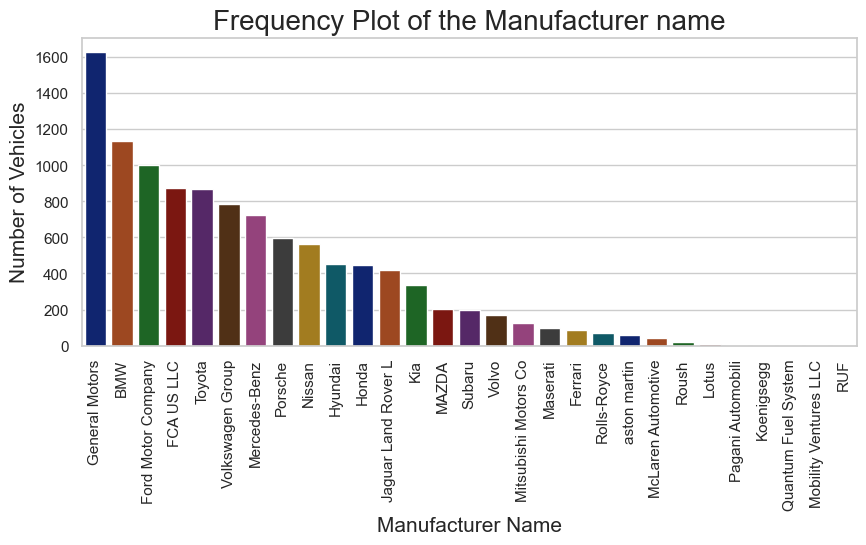

In [45]:
Mfr_name = pd.DataFrame(df.Mfr_Name.value_counts())
plt.figure(figsize = (10,4))
#palette = ["#FF9999", "#66B2FF", "#99FF99"] 
sns.barplot(data = Mfr_name, x= Mfr_name.index, y = 'count', errwidth=0.2, palette = "dark")
plt.ylabel('Number of Vehicles', size = 15)
plt.xlabel('Manufacturer Name', size = 15)
plt.title('Frequency Plot of the Manufacturer name', size = 20)
plt.xticks(rotation = 90)
plt.show()

### Average Fuel Efficiency by Vehicle Manufacturers

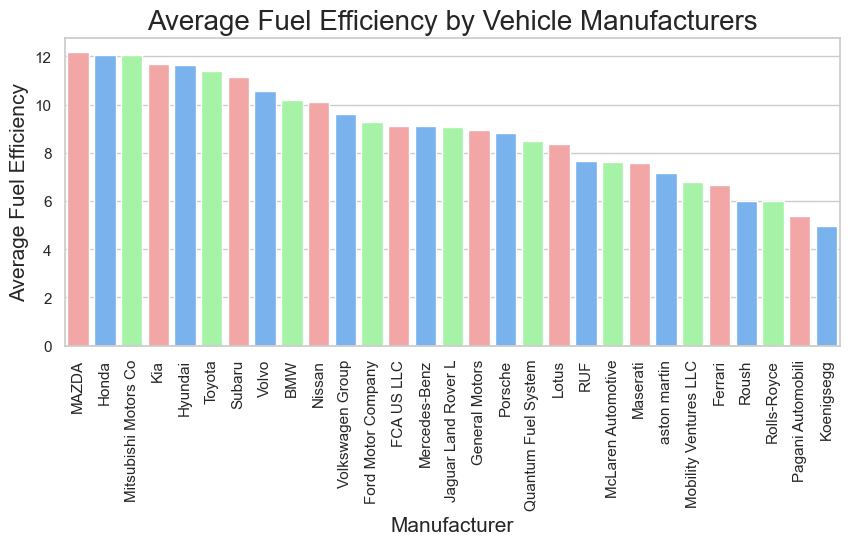

In [46]:
Mfr_name = pd.DataFrame(df.Mfr_Name.value_counts())
Mfr_name['Combined_FE'] = df.groupby('Mfr_Name')['Combined_FE'].mean()
Mfr_name = Mfr_name.sort_values(by = 'Combined_FE', ascending = False)
Mfr_name
plt.figure(figsize = (10,4))
palette = ["#FF9999", "#66B2FF", "#99FF99"] 
sns.barplot(data = Mfr_name, x= Mfr_name.index, y = 'Combined_FE', errwidth=0.2, palette=palette)
plt.ylabel('Average Fuel Efficiency', size = 15)
plt.xlabel('Manufacturer', size = 15)
plt.title('Average Fuel Efficiency by Vehicle Manufacturers', size = 20)
plt.xticks(rotation = 90)
plt.show()

In [47]:
Mfr_name.head(10)

,count,Combined_FE
Mfr_Name,,
MAZDA,201,12.170428
Honda,449,12.071512
Mitsubishi Motors Co,124,12.061630
Kia,337,11.674316
Hyundai,451,11.656943
Toyota,867,11.398852
Subaru,200,11.151419
Volvo,170,10.558475
BMW,1134,10.182741


### Distribution of Fuel Economy by Transmission type

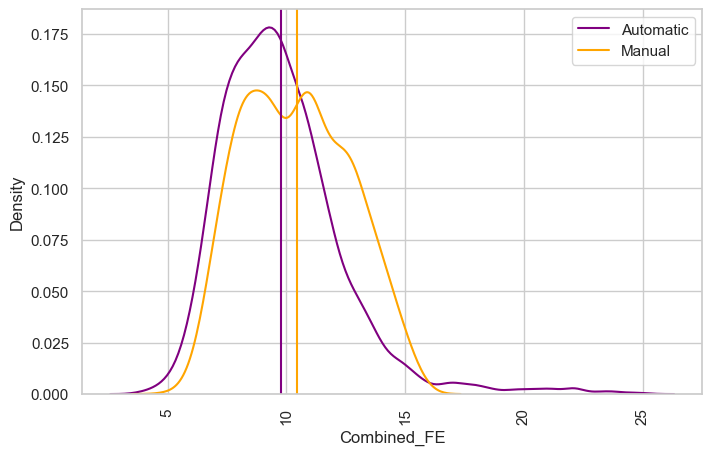

In [48]:
fig,ax = plt.subplots(1,1,figsize = (8,5))
sns.kdeplot(df[df['Transmission']=='Automatic']['Combined_FE'], color = 'purple', label = 'Automatic', ax = ax)
sns.kdeplot(df[df['Transmission']=='Manual']['Combined_FE'], color = 'orange',label = 'Manual', ax = ax)
plt.axvline(df[df['Transmission']=='Automatic']['Combined_FE'].mean(), color = 'purple')
plt.axvline(df[df['Transmission']=='Manual']['Combined_FE'].mean(), color = 'orange')
plt.legend()
plt.xticks(rotation = 'vertical')
plt.show()

### Distribution of Average Fuel Econmy by Vehicle Divisions/Brands 

In [49]:
brands = df.groupby('Division')['Combined_FE'].mean().round(2)
brands = pd.DataFrame({'Average_Combined_FE': brands})
brands['Average_Highway_FE'] = df.groupby('Division')['Highway_FE'].mean().round(2)
brands['Average_City_FE'] = df.groupby('Division')['City_FE'].mean().round(2)
brands.sort_values(by = 'Average_Combined_FE', ascending = False, inplace = True)
brands

,Average_Combined_FE,Average_Highway_FE,Average_City_FE
Division,,,
Honda,12.85,14.64,11.74
Hyundai,12.39,14.10,11.28
SCION,12.19,14.20,10.91
MAZDA,12.17,14.26,10.88
Mitsubishi,12.04,13.56,11.10
TOYOTA,11.88,13.14,11.11
FIAT,11.87,13.91,10.65
Mini,11.86,14.10,10.49
KIA,11.67,13.33,10.65


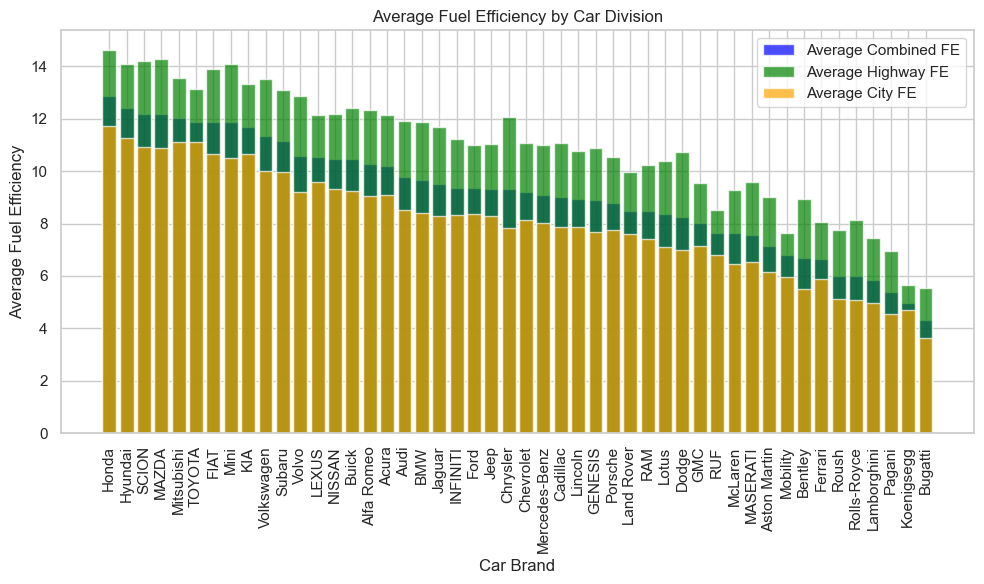

In [50]:
plt.figure(figsize=(10, 6))

plt.bar(brands.index, brands['Average_Combined_FE'], label='Average Combined FE', color='blue', alpha=0.7)
plt.bar(brands.index, brands['Average_Highway_FE'], label='Average Highway FE', color='green', alpha=0.7)
plt.bar(brands.index, brands['Average_City_FE'], label='Average City FE', color='orange', alpha=0.7)

plt.xlabel('Car Brand')
plt.ylabel('Average Fuel Efficiency')
plt.title('Average Fuel Efficiency by Car Division')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

#### **Insight**: **Honda** offers the highest fuel economy while **Bugatti** offers the worst fuel economy

### crosstabulate transmission, fuel type, city FE and highway FE

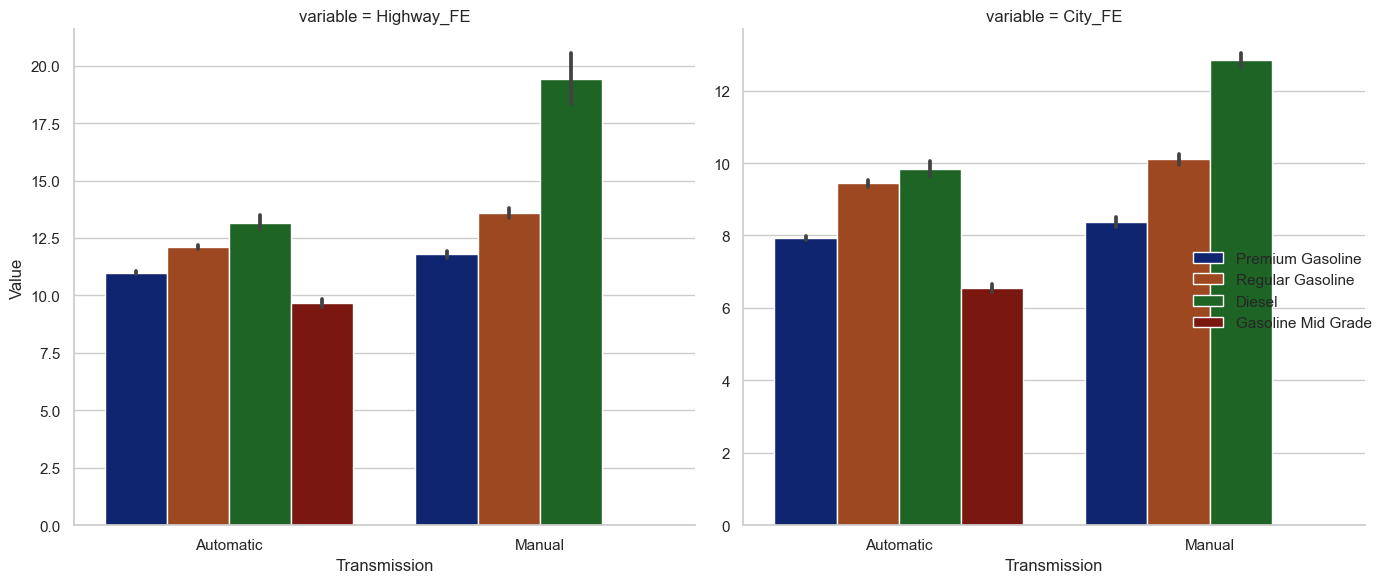

In [51]:
categorical_columns = ['Transmission', 'Fuel_Usage_Desc']

# Create faceted bar plots using seaborn
#sns.set(style='dackgrid')
g = sns.FacetGrid(df.melt(id_vars=categorical_columns, value_vars=['Highway_FE', 'City_FE']), 
                  col='variable', col_wrap=2, height=6, sharey=False)
g.map_dataframe(sns.barplot, x='Transmission', y='value', hue='Fuel_Usage_Desc', dodge=True, palette='dark')
g.set_axis_labels('Transmission', 'Value')
g.add_legend()

plt.tight_layout()
plt.show()

In [52]:
df.columns

Index(['Model_Year', 'Mfr_Name', 'Division', 'Carline', 'Engine_Displacement',
       'Cylinder', 'Transmission', 'City_FE', 'Highway_FE', 'Combined_FE',
       'Air_Aspiration_Method', 'Transmission_Desc', 'Gears', 'Drive_Desc',
       'Fuel_Usage_Desc', 'Carline_Class_Desc'],
      dtype='object')

In [53]:
df.groupby('Fuel_Usage_Desc')['Combined_FE'].mean().round(2)

Fuel_Usage_Desc
Diesel                11.22
Gasoline Mid Grade     7.64
Premium Gasoline       9.12
Regular Gasoline      10.55
Name: Combined_FE, dtype: float64

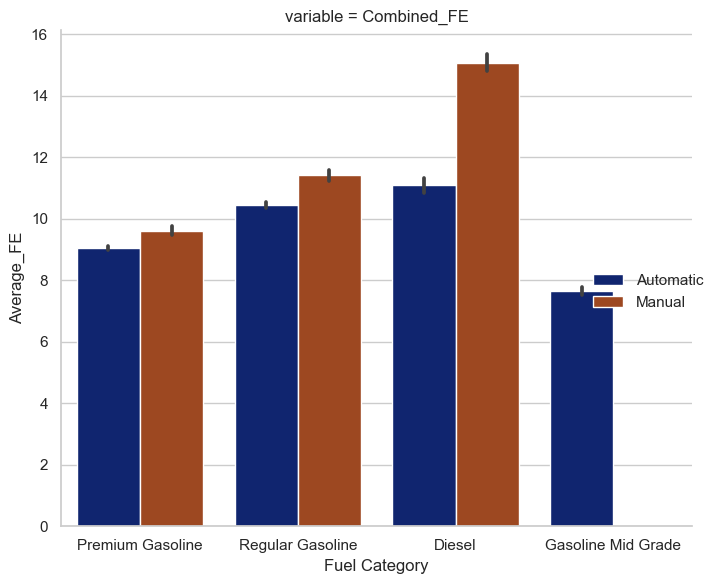

In [54]:
g = sns.FacetGrid(df.melt(id_vars=['Fuel_Usage_Desc', 'Transmission'], value_vars=['Combined_FE']), 
                  col='variable', col_wrap=1, height=6, sharey=False)
g.map_dataframe(sns.barplot, x='Fuel_Usage_Desc', y='value', hue = 'Transmission', palette='dark')
g.set_axis_labels('Fuel Category', 'Average_FE')
g.add_legend()

plt.tight_layout()
plt.show()

### **Insight**: **Diesel** fuel type perform very well on both city and highway route either automatic or manual mode of transmission

### Drive description with transmission type 

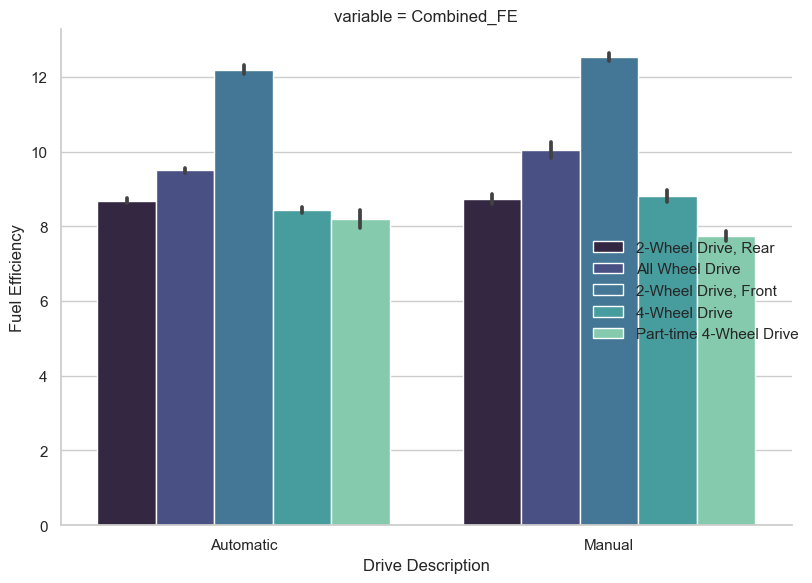

In [55]:
g = sns.FacetGrid(df.melt(id_vars=['Drive_Desc', 'Transmission'], value_vars=['Combined_FE']), 
                  col='variable', col_wrap=1, height=6, sharey=False)
g.map_dataframe(sns.barplot, x='Transmission', y='value', hue = 'Drive_Desc', palette='mako')
g.set_axis_labels('Drive Description', 'Fuel Efficiency')
g.add_legend()

plt.tight_layout()
plt.show()

#### **Insight**: No significance difference

### Plots of categorical variables

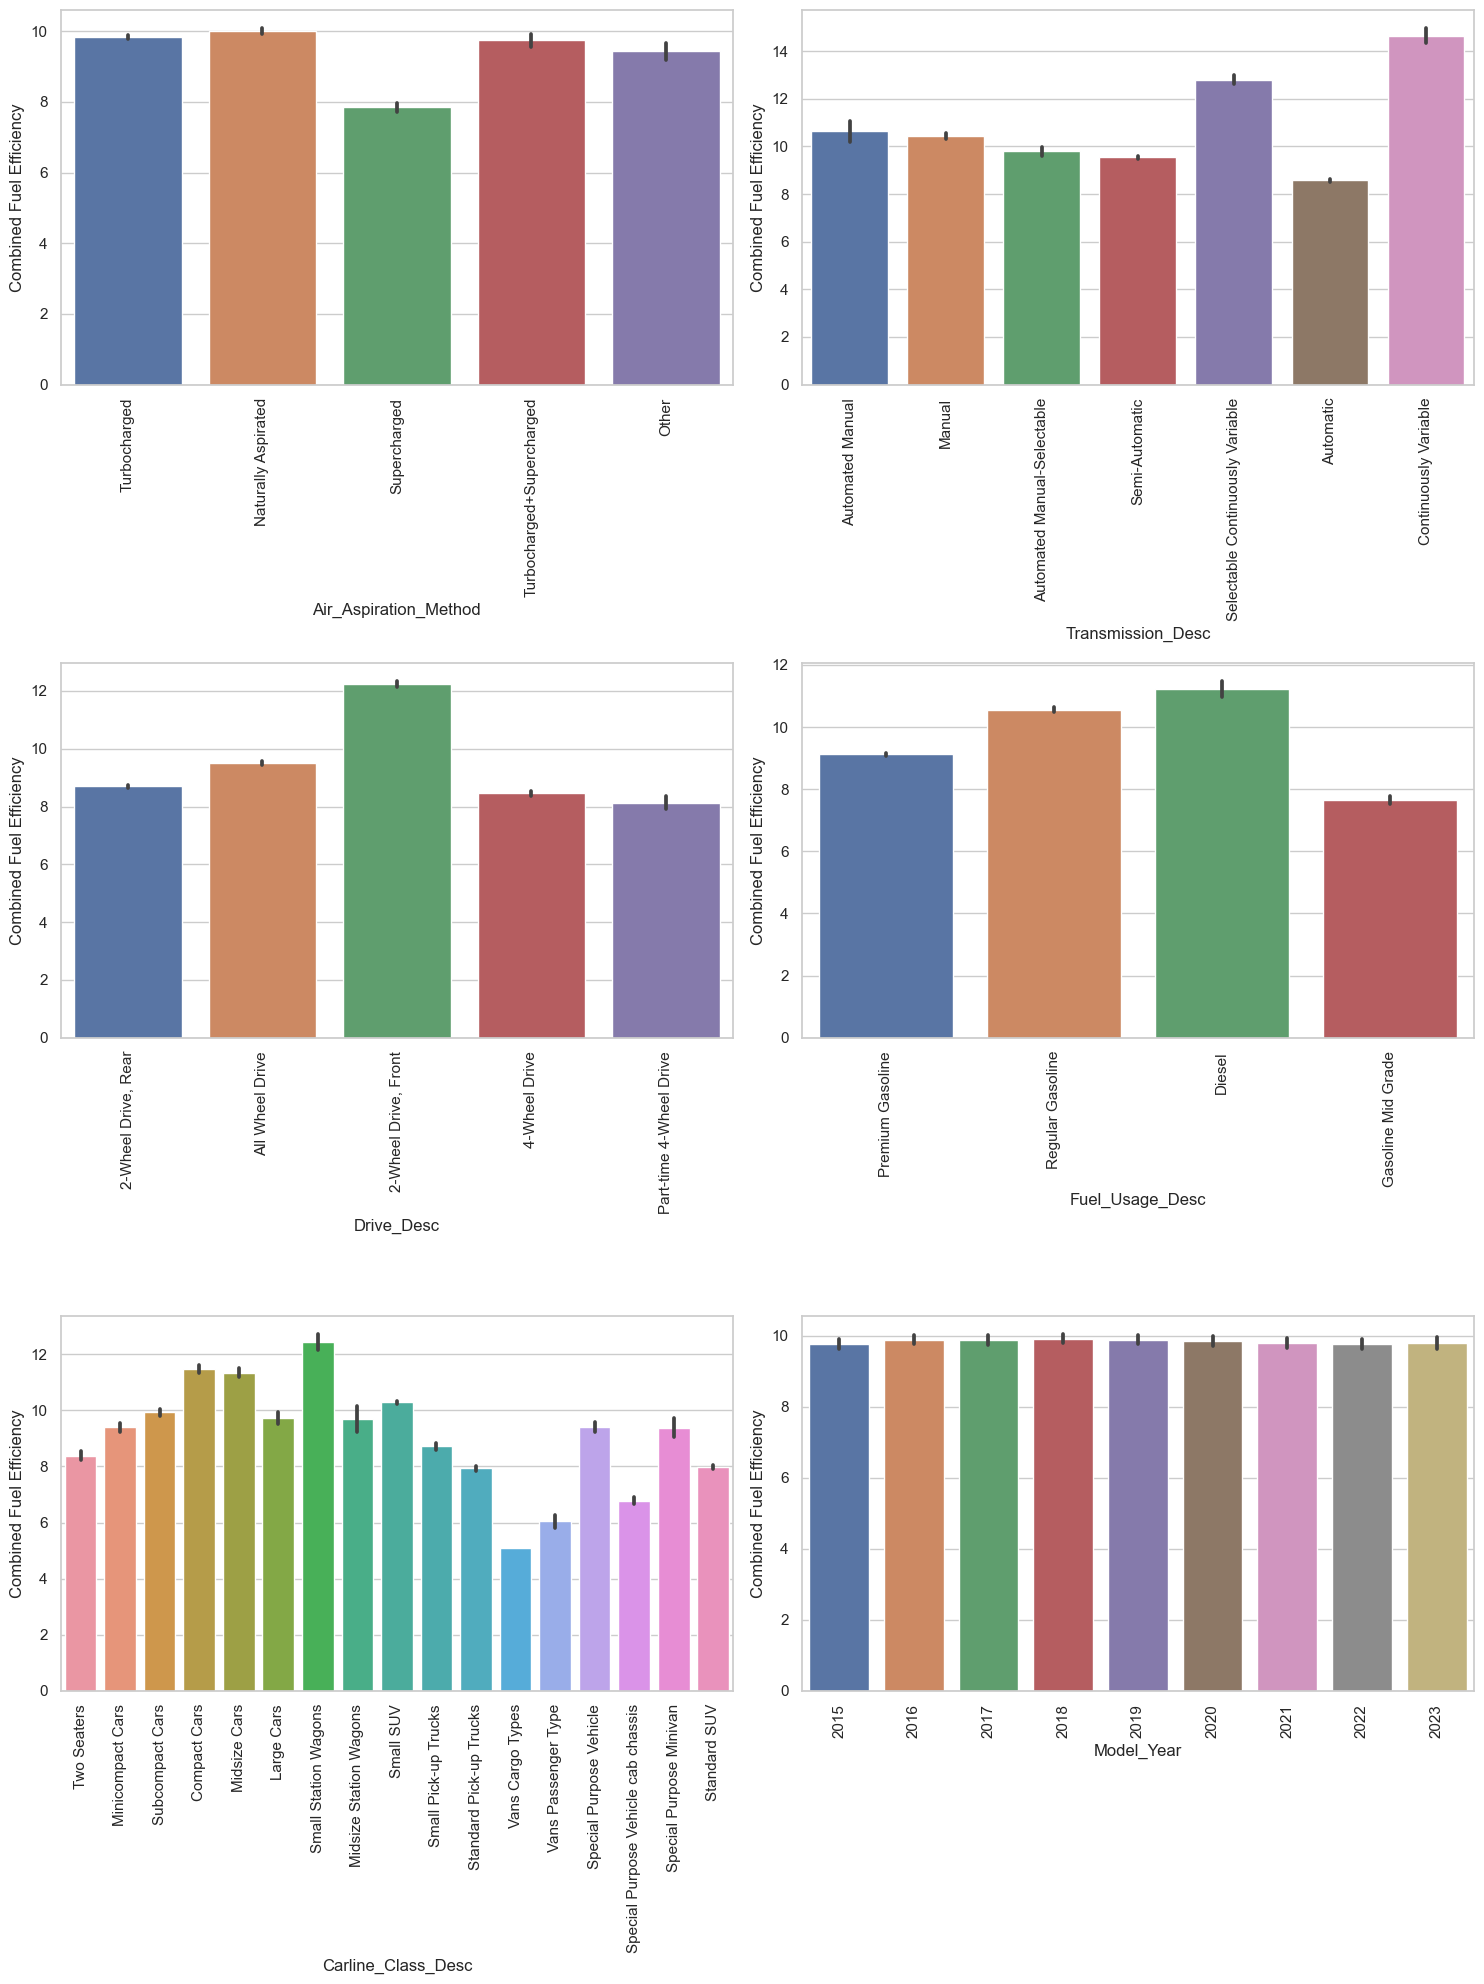

In [56]:
category = [ 'Air_Aspiration_Method', 'Transmission_Desc', 'Drive_Desc', 'Fuel_Usage_Desc', 'Carline_Class_Desc', 'Model_Year']
plt.figure(figsize=(15, 20))  # Adjust the figure size as needed

for index, i in enumerate(category):
    plt.subplot(3, 2, index+1)  # 2 rows, 3 columns grid
    sns.barplot(data=df, x=i, y='Combined_FE')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.xlabel(i)
    plt.ylabel('Combined Fuel Efficiency')

plt.tight_layout()
plt.show()

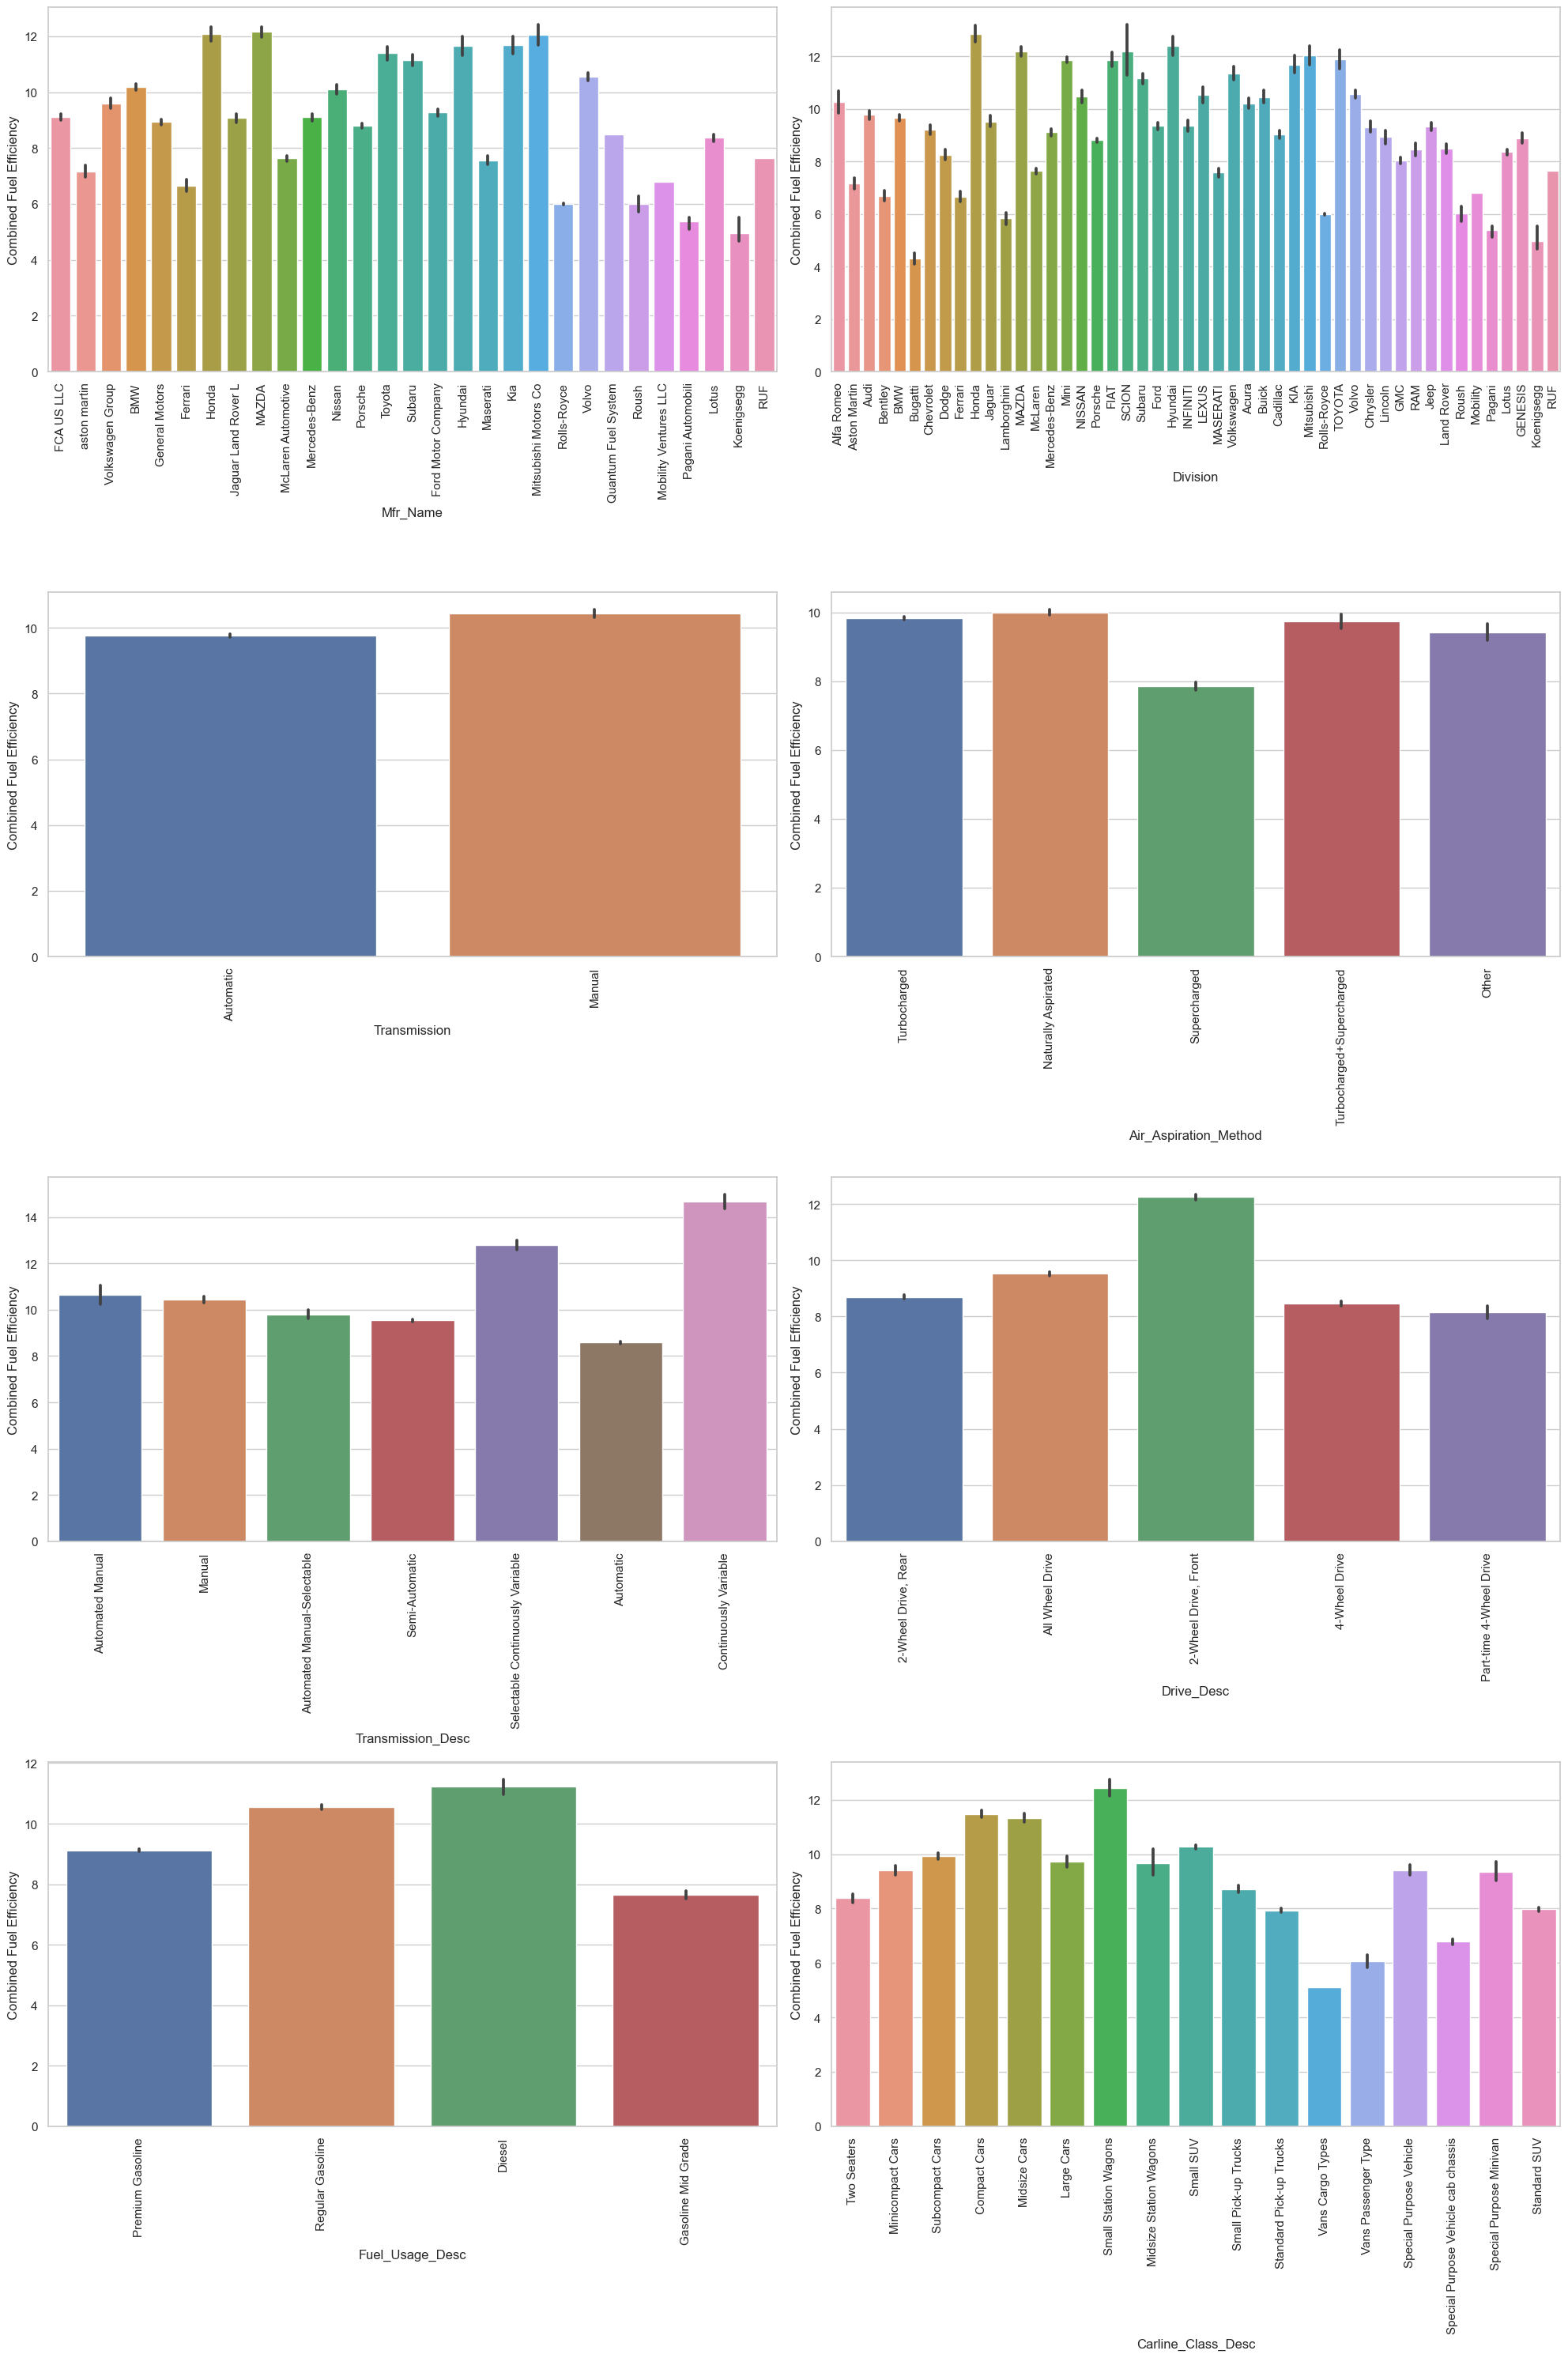

In [57]:
cat_plot = ['Mfr_Name', 'Division',  'Transmission', 'Air_Aspiration_Method', 'Transmission_Desc', 'Drive_Desc',
 'Fuel_Usage_Desc', 'Carline_Class_Desc']
plt.figure(figsize=(20, 30))  # Adjust the figure size as needed

for index, i in enumerate(cat_plot):
    plt.subplot(4, 2, index+1)  # 2 rows, 3 columns grid
    sns.barplot(data=df, x=i, y='Combined_FE')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.xlabel(i)
    plt.ylabel('Combined Fuel Efficiency')

plt.tight_layout()
plt.show()

### Combined Fuel Efficiency Over the Last 9 Years

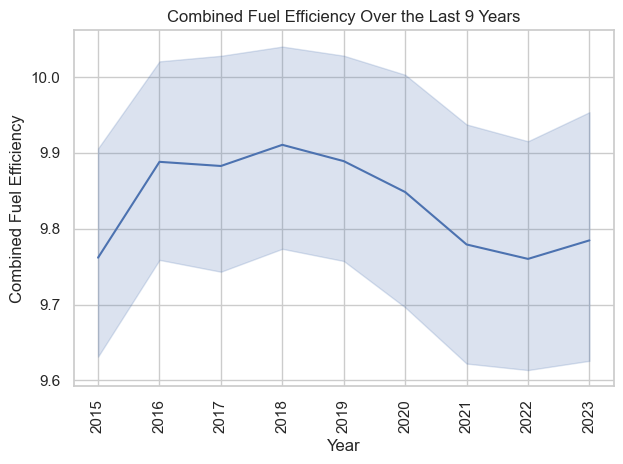

In [58]:
sns.lineplot(data=df, x='Model_Year', y='Combined_FE')
plt.xlabel('Year')
plt.ylabel('Combined Fuel Efficiency')
plt.title('Combined Fuel Efficiency Over the Last 9 Years')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

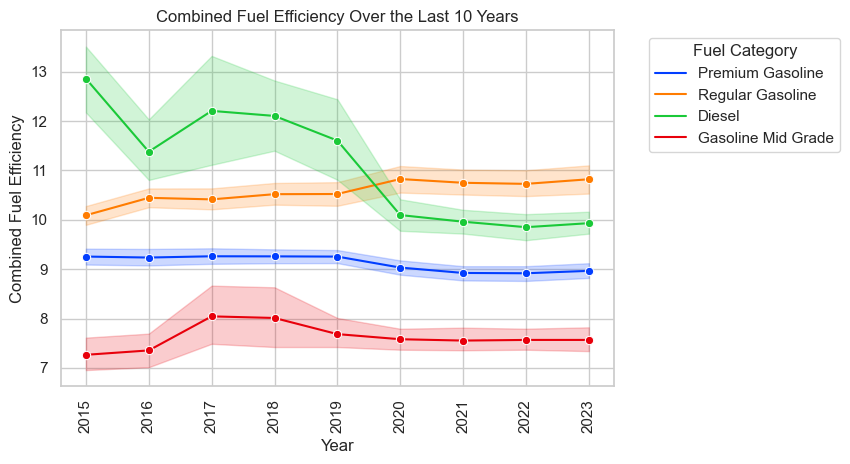

In [59]:
sns.lineplot(data=df, x='Model_Year', y='Combined_FE', hue = 'Fuel_Usage_Desc', marker='o', palette= 'bright')
plt.xlabel('Year')
plt.ylabel('Combined Fuel Efficiency')
plt.title('Combined Fuel Efficiency Over the Last 10 Years')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.legend(title='Fuel Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

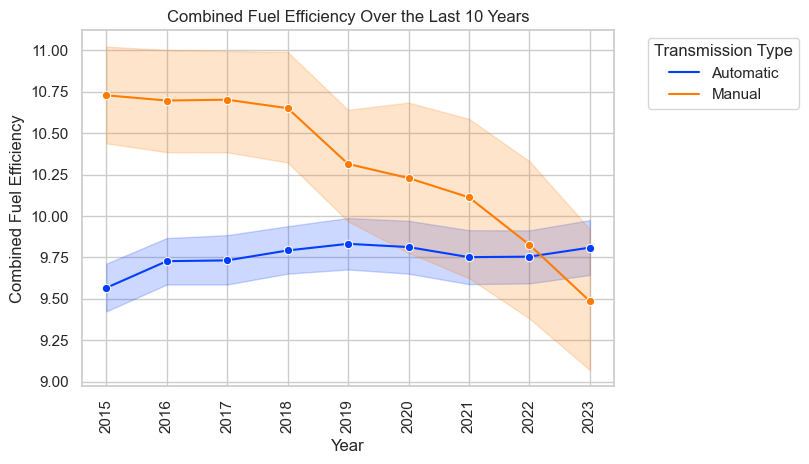

In [60]:
sns.lineplot(data=df, x='Model_Year', y='Combined_FE', hue = 'Transmission', marker='o', palette= 'bright')
plt.xlabel('Year')
plt.ylabel('Combined Fuel Efficiency')
plt.title('Combined Fuel Efficiency Over the Last 10 Years')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.legend(title='Transmission Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### **Insights**
1. For the past 9-years, diesel fuel type has been the best performing fuel economy fuel type but from 2020-2023 regular gasoline has been the fuel type that provide best fuel economy
2. Manual type of transmission is the one with most fuel ecocmy but there is decline in 2022-2023 which makes automatic to give best fuel ecocnomy

### checking for possibility of linearity for prediction of dependent variable from independent variables

<Axes: xlabel='Cylinder', ylabel='Combined_FE'>

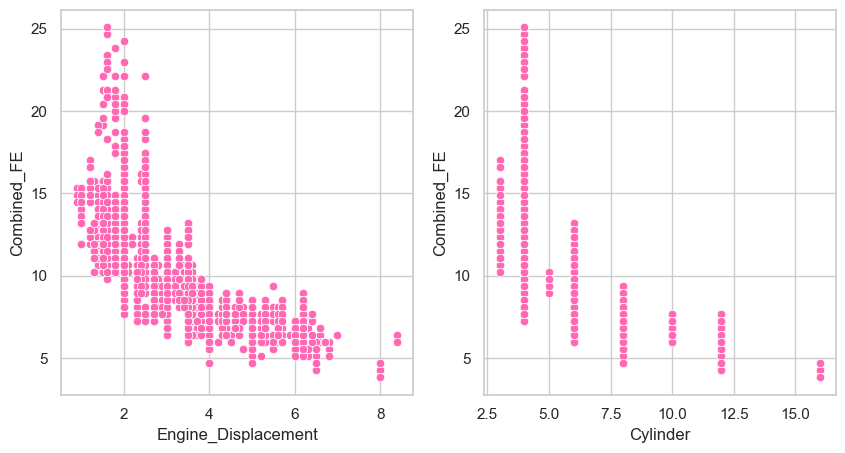

In [61]:
fig, ax = plt.subplots(1, 2,figsize=(10,5))
sns.scatterplot(data = df, x= 'Engine_Displacement', y = 'Combined_FE', color = 'hotpink', ax = ax[0])
sns.scatterplot(data = df, x= 'Cylinder', y = 'Combined_FE', color = 'hotpink', ax = ax[1])

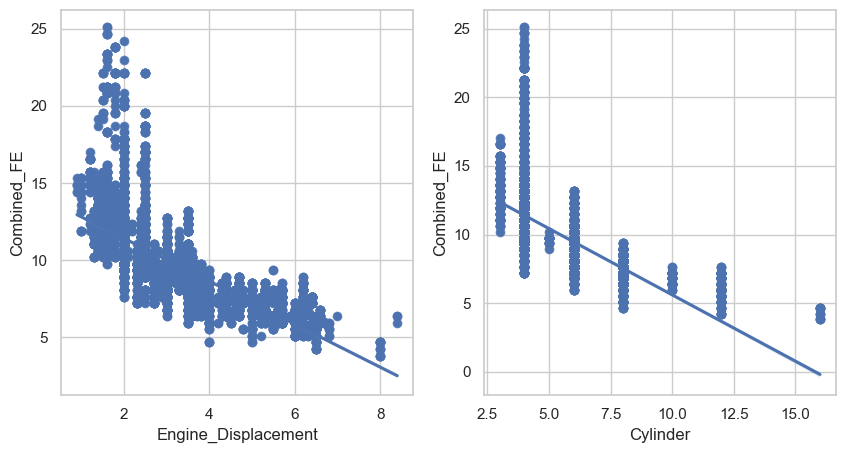

In [62]:
fig, (ax1, ax2) = plt.subplots(figsize = (10,5), ncols=2,sharey=False)
sns.scatterplot( data = df, x= 'Engine_Displacement', y = 'Combined_FE',  ax=ax1)
sns.regplot(data = df, x= 'Engine_Displacement', y = 'Combined_FE', ax=ax1)
 
sns.scatterplot(data = df, x= 'Cylinder', y = 'Combined_FE', ax=ax2)
sns.regplot(data = df, x= 'Cylinder', y = 'Combined_FE',  ax=ax2);

### Detecting outliers

<Axes: xlabel='Model_Year', ylabel='Combined_FE'>

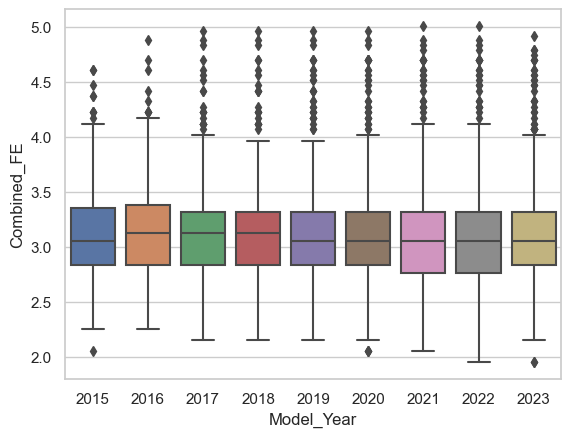

In [63]:
sns.boxplot(y = np.sqrt(df.Combined_FE), x = df.Model_Year)

<Axes: xlabel='Engine_Displacement', ylabel='Combined_FE'>

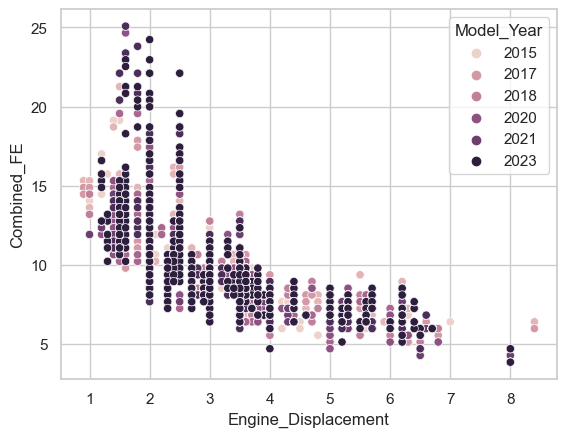

In [64]:
sns.scatterplot(y=df.Combined_FE, x= df.Engine_Displacement, hue = df.Model_Year)

In [65]:
df.columns

Index(['Model_Year', 'Mfr_Name', 'Division', 'Carline', 'Engine_Displacement',
       'Cylinder', 'Transmission', 'City_FE', 'Highway_FE', 'Combined_FE',
       'Air_Aspiration_Method', 'Transmission_Desc', 'Gears', 'Drive_Desc',
       'Fuel_Usage_Desc', 'Carline_Class_Desc'],
      dtype='object')

In [66]:
df.columns

Index(['Model_Year', 'Mfr_Name', 'Division', 'Carline', 'Engine_Displacement',
       'Cylinder', 'Transmission', 'City_FE', 'Highway_FE', 'Combined_FE',
       'Air_Aspiration_Method', 'Transmission_Desc', 'Gears', 'Drive_Desc',
       'Fuel_Usage_Desc', 'Carline_Class_Desc'],
      dtype='object')

In [67]:
num_cols

['Model_Year',
 'Engine_Displacement',
 'Cylinder',
 'City_FE',
 'Highway_FE',
 'Combined_FE',
 'Gears']

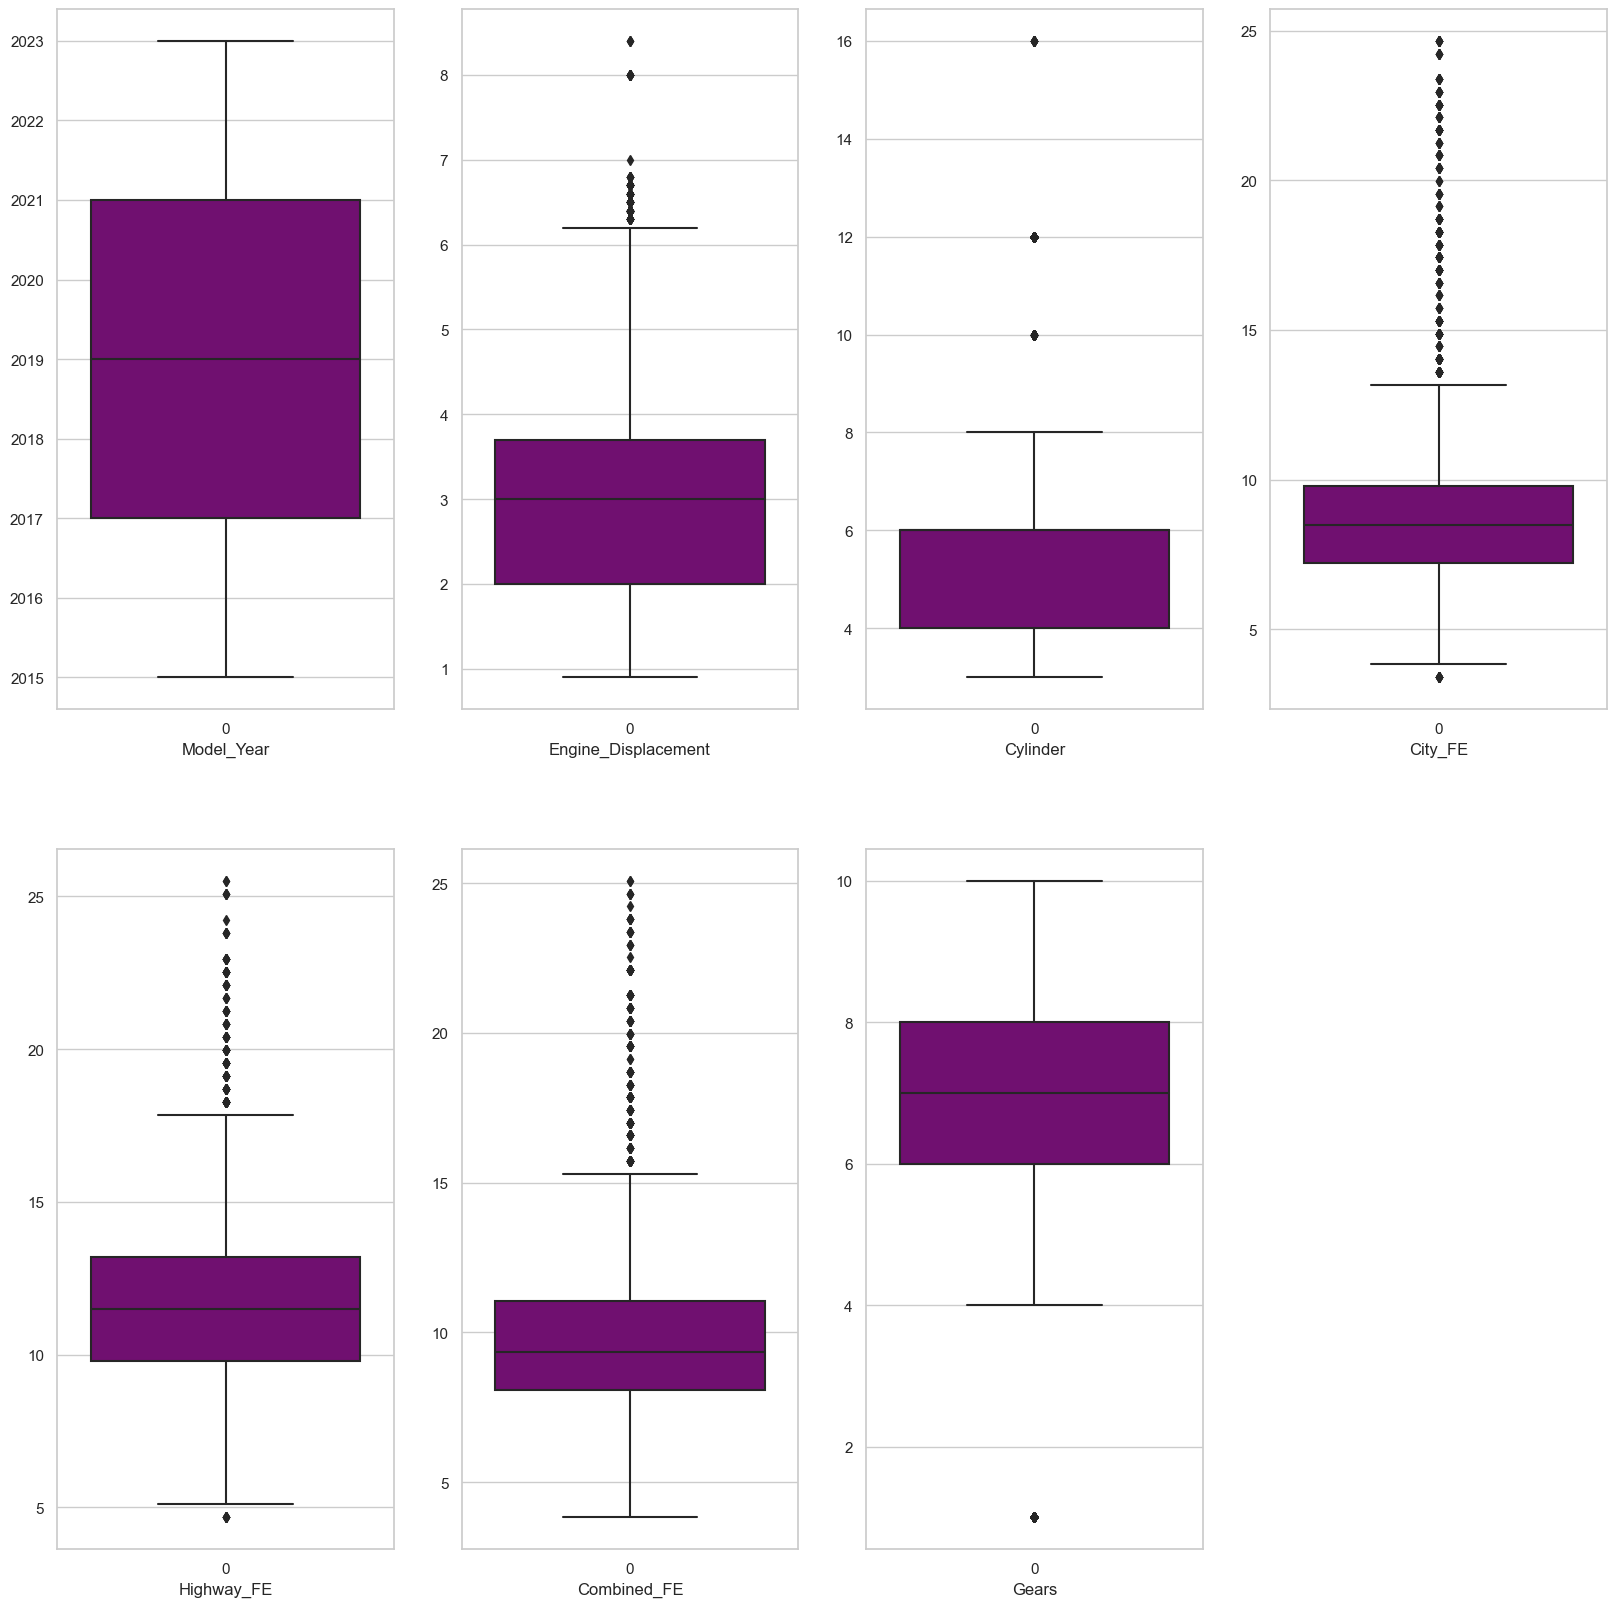

In [68]:
plt.figure(figsize =(20,20))

for i in range(len(num_cols)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(df[num_cols[i]], color = 'purple')
    plt.xlabel(num_cols[i])

### Examine the correlation between vehicle specifications and combined fuel economy

<Axes: >

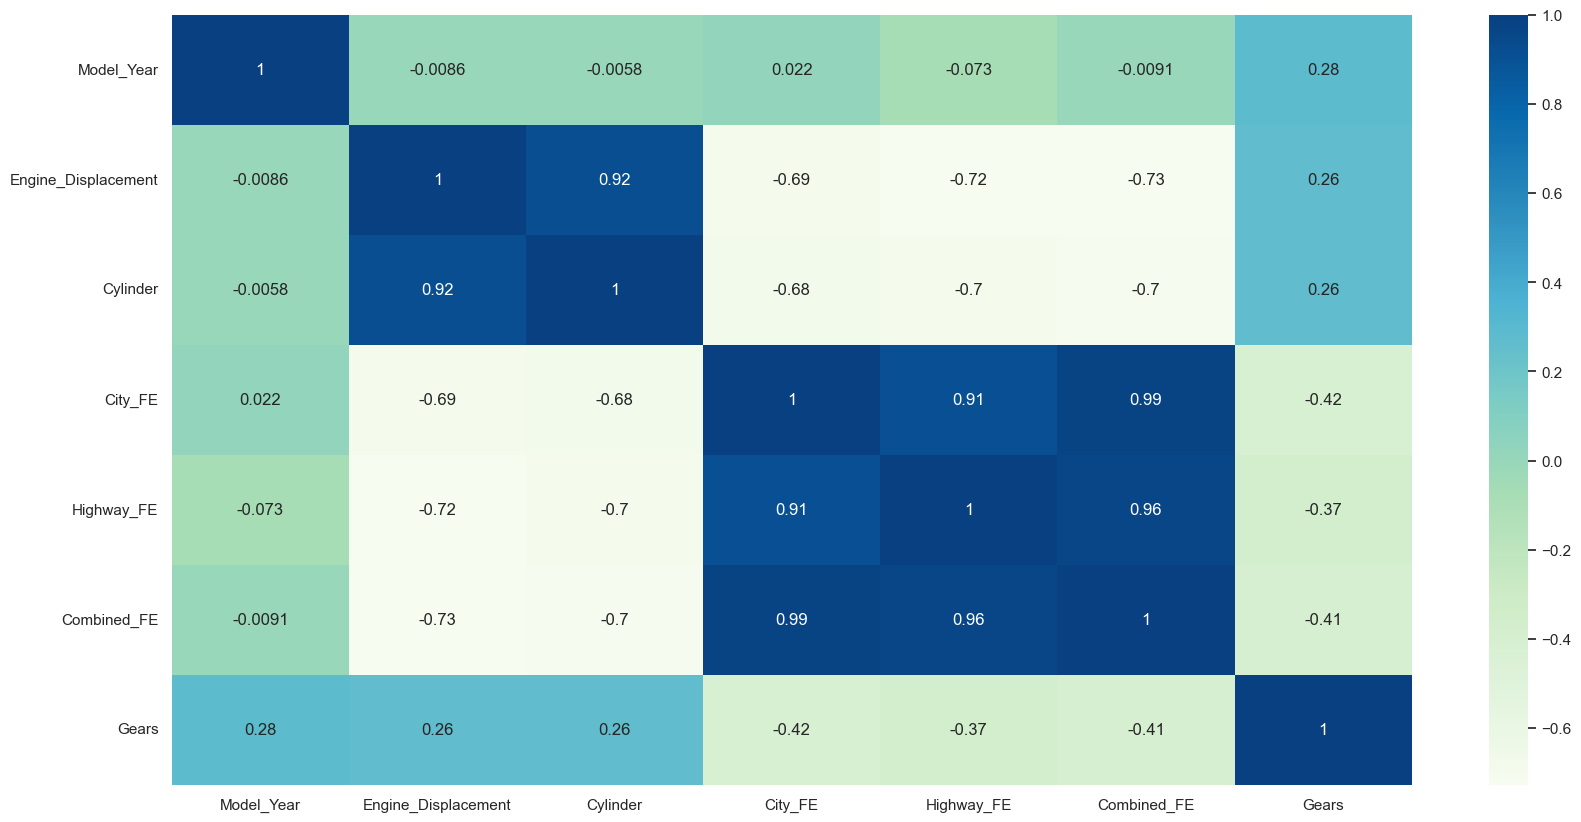

In [69]:
plt.figure(figsize = (20,10))
sns.heatmap(df[num_cols].corr(), annot = True, cmap = 'GnBu')

In [70]:
df[num_cols].corrwith(df.Combined_FE)

Model_Year            -0.009106
Engine_Displacement   -0.726850
Cylinder              -0.704991
City_FE                0.985561
Highway_FE             0.960436
Combined_FE            1.000000
Gears                 -0.410558
dtype: float64

# Hypothesis testing

## T test

In [71]:
# T test of City_FE and Highway FE
import scipy
stat, p = scipy.stats.ttest_ind(df.City_FE, df.Highway_FE)
stat, p

(-83.46184368194537, 0.0)

In [72]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

## ANOVA Test

In [73]:
model = ols('City_FE ~ (Division)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
pd.options.display.float_format = '{:.6f}'.format
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Division,47.000000,23005.311960,489.474723,107.397146,0.000000
Residual,10874.000000,49559.493275,4.557614,NaN,NaN


In [74]:
model = ols('Combined_FE ~ (Division)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
pd.options.display.float_format = '{:.6f}'.format
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Division,47.000000,23616.148373,502.471242,114.434906,0.000000
Residual,10874.000000,47746.552778,4.390891,NaN,NaN


In [75]:
model = ols('Combined_FE ~ (Transmission)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
pd.options.display.float_format = '{:.6f}'.format
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Transmission,1.000000,530.033496,530.033496,81.713226,0.000000
Residual,10920.000000,70832.667655,6.486508,NaN,NaN


In [76]:
model = ols('Combined_FE ~ (Fuel_Usage_Desc)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
pd.options.display.float_format = '{:.6f}'.format
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Fuel_Usage_Desc,3.000000,6429.573198,2143.191066,360.360894,0.000000
Residual,10918.000000,64933.127953,5.947346,NaN,NaN


In [77]:
model = ols('Combined_FE ~ (Model_Year)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
pd.options.display.float_format = '{:.6f}'.format
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Model_Year,1.000000,5.917098,5.917098,0.905516,0.341328
Residual,10920.000000,71356.784053,6.534504,NaN,NaN


In [78]:
model = ols('Combined_FE ~ (Mfr_Name)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
pd.options.display.float_format = '{:.6f}'.format
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Mfr_Name,28.000000,16287.874139,581.709791,115.053739,0.000000
Residual,10893.000000,55074.827012,5.055983,NaN,NaN


In [79]:
model = ols('Combined_FE ~ (Carline_Class_Desc)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
pd.options.display.float_format = '{:.6f}'.format
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Carline_Class_Desc,16.000000,19858.864267,1241.179017,262.797065,0.000000
Residual,10905.000000,51503.836884,4.722956,NaN,NaN


In [80]:
df.columns

Index(['Model_Year', 'Mfr_Name', 'Division', 'Carline', 'Engine_Displacement',
       'Cylinder', 'Transmission', 'City_FE', 'Highway_FE', 'Combined_FE',
       'Air_Aspiration_Method', 'Transmission_Desc', 'Gears', 'Drive_Desc',
       'Fuel_Usage_Desc', 'Carline_Class_Desc'],
      dtype='object')

# Machine Learning Modeling

In [81]:
x= df.drop(['Mfr_Name', 'Carline', 'City_FE', 'Highway_FE','Combined_FE'], axis =1)
y = df.Combined_FE

In [82]:
x

,Model_Year,Division,Engine_Displacement,Cylinder,Transmission,Air_Aspiration_Method,Transmission_Desc,Gears,Drive_Desc,Fuel_Usage_Desc,Carline_Class_Desc
0,2015,Alfa Romeo,1.800000,4,Automatic,Turbocharged,Automated Manual,6,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
1,2015,Aston Martin,6.000000,12,Automatic,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
2,2015,Aston Martin,4.700000,8,Automatic,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
3,2015,Aston Martin,4.700000,8,Manual,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
4,2015,Aston Martin,4.700000,8,Automatic,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
...,...,...,...,...,...,...,...,...,...,...,...
10917,2023,Chevrolet,2.700000,4,Automatic,Turbocharged,Automatic,8,4-Wheel Drive,Regular Gasoline,Small Pick-up Trucks
10918,2023,GMC,2.700000,4,Automatic,Turbocharged,Automatic,8,4-Wheel Drive,Regular Gasoline,Small Pick-up Trucks
10919,2023,GMC,2.700000,4,Automatic,Turbocharged,Automatic,8,4-Wheel Drive,Regular Gasoline,Small Pick-up Trucks
10920,2023,RAM,5.700000,8,Automatic,Naturally Aspirated,Automatic,8,"2-Wheel Drive, Rear",Gasoline Mid Grade,Standard Pick-up Trucks


In [83]:
y

0       11.903900
1        5.952000
2        6.802200
3        6.377100
4        6.802200
           ...   
10917    7.652500
10918    8.077700
10919    7.652500
10920    7.227400
10921    7.227400
Name: Combined_FE, Length: 10922, dtype: float64

In [84]:
X_train, X_test, y_train,y_test = train_test_split(x,y, test_size = 0.2, shuffle = True, random_state = 12)

In [85]:
train_cat_cols = [col for col in X_train.columns if X_train[col].dtype == 'O']
train_num_cols = [col for col in X_train.columns if X_train[col].dtype != 'O']

In [86]:
train_cat_cols

['Division',
 'Transmission',
 'Air_Aspiration_Method',
 'Transmission_Desc',
 'Drive_Desc',
 'Fuel_Usage_Desc',
 'Carline_Class_Desc']

In [87]:
train_num_cols

['Model_Year', 'Engine_Displacement', 'Cylinder', 'Gears']

In [88]:
X_test.shape, X_train.shape

((2185, 11), (8737, 11))

In [89]:
preprocess = ColumnTransformer([('num', StandardScaler(), train_num_cols), ('cat', OneHotEncoder(), train_cat_cols) ],
                                                       remainder = 'passthrough')

In [90]:
models = OrderedDict([
                      ("LinearRegression",         Pipeline([('prep', preprocess),  ('model', LinearRegression())])),

                      ("RidgeRegression",          Pipeline([('prep', preprocess),  ('model', Ridge())])),

                      ("LassoRegression",          Pipeline([('prep', preprocess),  ('model', Lasso())])),
    
                      ("DecisionTree",             Pipeline([('prep', preprocess), ('model', DecisionTreeRegressor())])),
    
                      ("RandomForest",             Pipeline([('prep', preprocess), ('model', RandomForestRegressor())])),
                      
                      ("Adaboost",                 Pipeline([('prep', preprocess), ('model', AdaBoostRegressor())])), 

                      ("Gradientboost",            Pipeline([('prep', preprocess), ('model', GradientBoostingRegressor())])),
    
                      ("XGBoost",                  Pipeline([('prep', preprocess), ('model', XGBRegressor())])),
    
                      ("Lightgbm",                 Pipeline([('prep', preprocess), ('model', LGBMRegressor())])),

                      ("Catboost",                 Pipeline([('prep', preprocess), ('model', CatBoostRegressor())]))
                                          
                                                                                                                      ])

In [91]:
scores = {}
for (name, model) in models.items():
    model.fit(X_train,y_train)
    scores[name] =R2(model.predict(X_test), y_test)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 8737, number of used features: 83
[LightGBM] [Info] Start training from score 9.842694
Learning rate set to 0.057665
0:	learn: 2.4524924	total: 489ms	remaining: 8m 8s
1:	learn: 2.3617522	total: 493ms	remaining: 4m 5s
2:	learn: 2.2804667	total: 497ms	remaining: 2m 45s
3:	learn: 2.2003924	total: 501ms	remaining: 2m 4s
4:	learn: 2.1272921	total: 505ms	remaining: 1m 40s
5:	learn: 2.0612446	total: 509ms	remaining: 1m 24s
6:	learn: 1.9948125	total: 513ms	remaining: 1m 12s
7:	learn: 1.9349791	total: 517ms	remaining: 1m 4s
8:	learn: 1.8795114	total: 521ms	remaining: 57.4s
9:	learn: 1.8267029	total: 525ms	remaining: 52s
10:	learn: 1.7811100	total: 529ms	remaining: 47.6s
11:	learn:

In [92]:
accuracy =pd.DataFrame.from_dict(scores, columns=['Accuracy_Score'], dtype = "float", orient="index")
accuracy.sort_values(by="Accuracy_Score", ascending=False)

,Accuracy_Score
XGBoost,0.945360
RandomForest,0.945293
Catboost,0.942292
DecisionTree,0.936401
Lightgbm,0.922518
Gradientboost,0.842805
LinearRegression,0.755733
RidgeRegression,0.755002
Adaboost,0.703107
LassoRegression,-4.097486


In [93]:
scores = {}
for (name, model) in models.items():
    model.fit(X_train,y_train)
    scores[name] =np.sqrt(MSE(model.predict(X_test), y_test))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 8737, number of used features: 83
[LightGBM] [Info] Start training from score 9.842694
Learning rate set to 0.057665
0:	learn: 2.4524924	total: 6.16ms	remaining: 6.16s
1:	learn: 2.3617522	total: 11.6ms	remaining: 5.78s
2:	learn: 2.2804667	total: 15.4ms	remaining: 5.13s
3:	learn: 2.2003924	total: 19.3ms	remaining: 4.81s
4:	learn: 2.1272921	total: 23.2ms	remaining: 4.62s
5:	learn: 2.0612446	total: 27.3ms	remaining: 4.51s
6:	learn: 1.9948125	total: 31.3ms	remaining: 4.45s
7:	learn: 1.9349791	total: 35.6ms	remaining: 4.42s
8:	learn: 1.8795114	total: 39.5ms	remaining: 4.35s
9:	learn: 1.8267029	total: 43.4ms	remaining: 4.29s
10:	learn: 1.7811100	total: 47.3ms	remaining: 4.25s
1

In [94]:
accuracy =pd.DataFrame.from_dict(scores, columns=['RMSE'], dtype = "float", orient="index")
accuracy.sort_values(by="RMSE")

,RMSE
XGBoost,0.585786
RandomForest,0.590697
Catboost,0.597005
DecisionTree,0.654150
Lightgbm,0.684513
Gradientboost,0.896891
LinearRegression,1.141829
RidgeRegression,1.142289
Adaboost,1.324832
LassoRegression,2.010364


In [95]:
#hyperparameter tunning
model=   Pipeline(steps= [('prep', preprocess), ('Regressor', XGBRegressor())])

In [96]:
parameters = [{'Regressor': [RandomForestRegressor()],
                    'Regressor__n_estimators': [100, 200, 500, 600],
                          'Regressor__max_depth' : [30, 50, 70],
                                 'Regressor__min_samples_leaf' : [2, 5, 10],
                                        'Regressor__max_leaf_nodes' : [10, 20, 30, 50,60,70]},
               

               {'Regressor': [XGBRegressor()],
                   'Regressor__n_estimators': [100, 200, 500, 600],
                          'Regressor__max_depth' : [30, 50, 70],
                                 'Regressor__min_samples_leaf' : [2, 5, 10],
                                        'Regressor__max_leaf_nodes' : [10, 20, 30, 50,60,70],
                                            'Regressor__learning_rate' : [0.05, 0.10, 0.15, 0.5, 1]}]

cv = KFold(n_splits=10, shuffle = True, random_state=40)
rand_search = RandomizedSearchCV(model, parameters, cv = cv, verbose =1, n_jobs=-1 )
best_model = rand_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[18:14:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_leaf_nodes", "min_samples_leaf" } are not used.



In [185]:
best_model.best_params_

{'Regressor__n_estimators': 100,
 'Regressor__min_samples_leaf': 2,
 'Regressor__max_leaf_nodes': 10,
 'Regressor__max_depth': 30,
 'Regressor__learning_rate': 0.1,
 'Regressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaf_nodes=10,
              max_leaves=None, min_child_weight=None, min_samples_leaf=2,
              missing=nan, monotone_constraints=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)}

In [97]:
model=   Pipeline(steps= [('prep', preprocess), ('Regressor', RandomForestRegressor(n_estimators=700, max_depth=None, max_leaf_nodes=None,
                                                            min_samples_split=4,  min_samples_leaf=2, max_features='sqrt',))])
model.fit(X_train,y_train)
print(R2(model.predict(X_test), y_test))
print(MSE(model.predict(X_test), y_test))

0.9269207554038916
0.4115386413378741


In [98]:
print(R2(model.predict(X_train), y_train))
print(MSE(model.predict(X_train), y_train))

0.9526348815470964
0.2662138063727874


In [99]:
RandomForestRegressor(n_estimators=500,max_depth=30,min_samples_leaf=5, n_jobs=-1,random_state=42)
model = XGBRegressor(n_estimators=500,max_depth=20, subsample =0.5,learning_rate =0.1, random_state=42, min_child_weight=10,
                                                      alpha=10,  reg_lambda=10, gamma=30)
model = GradientBoostingRegressor(learning_rate=0.05, n_estimators=100, max_depth=30, max_leaf_nodes =None,
                                  min_samples_split=2, min_samples_leaf=5, random_state = 42)

In [100]:
model=   Pipeline(steps= [('prep', preprocess), ('Regressor', RandomForestRegressor(n_estimators=700,max_depth=None,
                                                            min_samples_leaf=2, n_jobs=-1, max_features='sqrt'))])
model.fit(X_train,y_train)
print(R2(model.predict(X_test), y_test))
print(MSE(model.predict(X_test), y_test))

0.9270441239733275
0.4113530695719603


In [101]:
print(R2(model.predict(X_train), y_train))
print(MSE(model.predict(X_train), y_train))

0.9531058797151297
0.2639587063368691


In [102]:
model=   Pipeline(steps= [('prep', preprocess), ('Regressor', XGBRegressor(n_estimators=700,max_depth=70,
                                                learning_rate = 0.05, min_samples_leaf = 10, max_leaf_nodes= 10,
                                                      ))])
model.fit(X_train,y_train)
print(R2(model.predict(X_test), y_test))
print(MSE(model.predict(X_test), y_test))

[18:16:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_leaf_nodes", "min_samples_leaf" } are not used.

0.9426537585041525
0.3796790237282093


In [103]:
print(R2(model.predict(X_train), y_train))
print(MSE(model.predict(X_train), y_train))

0.9817603919994274
0.11670619400060665


In [104]:
x= df.drop(['Mfr_Name', 'Carline', 'City_FE', 'Highway_FE','Combined_FE'], axis =1)
y = df.Combined_FE

In [105]:
new_df = df.drop(['Mfr_Name', 'Carline', 'City_FE', 'Highway_FE'], axis =1)
new_df

,Model_Year,Division,Engine_Displacement,Cylinder,Transmission,Combined_FE,Air_Aspiration_Method,Transmission_Desc,Gears,Drive_Desc,Fuel_Usage_Desc,Carline_Class_Desc
0,2015,Alfa Romeo,1.800000,4,Automatic,11.903900,Turbocharged,Automated Manual,6,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
1,2015,Aston Martin,6.000000,12,Automatic,5.952000,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
2,2015,Aston Martin,4.700000,8,Automatic,6.802200,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
3,2015,Aston Martin,4.700000,8,Manual,6.377100,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
4,2015,Aston Martin,4.700000,8,Automatic,6.802200,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
...,...,...,...,...,...,...,...,...,...,...,...,...
10917,2023,Chevrolet,2.700000,4,Automatic,7.652500,Turbocharged,Automatic,8,4-Wheel Drive,Regular Gasoline,Small Pick-up Trucks
10918,2023,GMC,2.700000,4,Automatic,8.077700,Turbocharged,Automatic,8,4-Wheel Drive,Regular Gasoline,Small Pick-up Trucks
10919,2023,GMC,2.700000,4,Automatic,7.652500,Turbocharged,Automatic,8,4-Wheel Drive,Regular Gasoline,Small Pick-up Trucks
10920,2023,RAM,5.700000,8,Automatic,7.227400,Naturally Aspirated,Automatic,8,"2-Wheel Drive, Rear",Gasoline Mid Grade,Standard Pick-up Trucks


## Outlier treatment to check for model improvement

In [106]:
Q1 = np.percentile(new_df.Combined_FE, 25)
Q3 = np.percentile(new_df.Combined_FE, 75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper =  Q3 + 1.5*IQR
outliers = new_df[(new_df['Combined_FE'] < lower) | (new_df['Combined_FE'] > upper)]
outliers

,Model_Year,Division,Engine_Displacement,Cylinder,Transmission,Combined_FE,Air_Aspiration_Method,Transmission_Desc,Gears,Drive_Desc,Fuel_Usage_Desc,Carline_Class_Desc
38,2015,Honda,1.500000,4,Automatic,15.730200,Naturally Aspirated,Selectable Continuously Variable,7,"2-Wheel Drive, Front",Regular Gasoline,Two Seaters
148,2015,SCION,1.300000,4,Automatic,15.730200,Naturally Aspirated,Continuously Variable,1,"2-Wheel Drive, Front",Regular Gasoline,Minicompact Cars
270,2015,BMW,2.000000,4,Automatic,15.730200,Turbocharged,Semi-Automatic,8,"2-Wheel Drive, Rear",Diesel,Compact Cars
341,2015,Honda,1.500000,4,Automatic,19.131300,Naturally Aspirated,Continuously Variable,1,"2-Wheel Drive, Front",Regular Gasoline,Compact Cars
359,2015,LEXUS,1.800000,4,Automatic,17.855900,Naturally Aspirated,Continuously Variable,1,"2-Wheel Drive, Front",Regular Gasoline,Compact Cars
...,...,...,...,...,...,...,...,...,...,...,...,...
10643,2023,KIA,1.600000,4,Automatic,18.281000,Turbocharged,Automated Manual-Selectable,6,"2-Wheel Drive, Front",Regular Gasoline,Small SUV
10654,2023,LEXUS,2.500000,4,Automatic,16.580500,Naturally Aspirated,Selectable Continuously Variable,6,All Wheel Drive,Premium Gasoline,Small SUV
10708,2023,TOYOTA,2.500000,4,Automatic,17.005600,Naturally Aspirated,Selectable Continuously Variable,6,All Wheel Drive,Regular Gasoline,Small SUV
10709,2023,TOYOTA,2.500000,4,Automatic,15.730200,Naturally Aspirated,Selectable Continuously Variable,6,All Wheel Drive,Regular Gasoline,Small SUV


In [107]:
new_df[new_df['Combined_FE'] < lower]

,Model_Year,Division,Engine_Displacement,Cylinder,Transmission,Combined_FE,Air_Aspiration_Method,Transmission_Desc,Gears,Drive_Desc,Fuel_Usage_Desc,Carline_Class_Desc


In [108]:
new_df[new_df['Combined_FE'] > upper]

,Model_Year,Division,Engine_Displacement,Cylinder,Transmission,Combined_FE,Air_Aspiration_Method,Transmission_Desc,Gears,Drive_Desc,Fuel_Usage_Desc,Carline_Class_Desc
38,2015,Honda,1.500000,4,Automatic,15.730200,Naturally Aspirated,Selectable Continuously Variable,7,"2-Wheel Drive, Front",Regular Gasoline,Two Seaters
148,2015,SCION,1.300000,4,Automatic,15.730200,Naturally Aspirated,Continuously Variable,1,"2-Wheel Drive, Front",Regular Gasoline,Minicompact Cars
270,2015,BMW,2.000000,4,Automatic,15.730200,Turbocharged,Semi-Automatic,8,"2-Wheel Drive, Rear",Diesel,Compact Cars
341,2015,Honda,1.500000,4,Automatic,19.131300,Naturally Aspirated,Continuously Variable,1,"2-Wheel Drive, Front",Regular Gasoline,Compact Cars
359,2015,LEXUS,1.800000,4,Automatic,17.855900,Naturally Aspirated,Continuously Variable,1,"2-Wheel Drive, Front",Regular Gasoline,Compact Cars
...,...,...,...,...,...,...,...,...,...,...,...,...
10643,2023,KIA,1.600000,4,Automatic,18.281000,Turbocharged,Automated Manual-Selectable,6,"2-Wheel Drive, Front",Regular Gasoline,Small SUV
10654,2023,LEXUS,2.500000,4,Automatic,16.580500,Naturally Aspirated,Selectable Continuously Variable,6,All Wheel Drive,Premium Gasoline,Small SUV
10708,2023,TOYOTA,2.500000,4,Automatic,17.005600,Naturally Aspirated,Selectable Continuously Variable,6,All Wheel Drive,Regular Gasoline,Small SUV
10709,2023,TOYOTA,2.500000,4,Automatic,15.730200,Naturally Aspirated,Selectable Continuously Variable,6,All Wheel Drive,Regular Gasoline,Small SUV


## Removing outliers from all the dataset. Implication: Data Linkage 

In [109]:
new_df['Combined_FE_'] = np.where(    
    (new_df['Combined_FE'] < lower) | (new_df['Combined_FE'] > upper),
    np.where(new_df['Combined_FE'] < lower, lower, upper),
    new_df['Combined_FE']
)

In [110]:
new_df[['Combined_FE', 'Combined_FE_']]

,Combined_FE,Combined_FE_
0,11.903900,11.903900
1,5.952000,5.952000
2,6.802200,6.802200
3,6.377100,6.377100
4,6.802200,6.802200
...,...,...
10917,7.652500,7.652500
10918,8.077700,8.077700
10919,7.652500,7.652500
10920,7.227400,7.227400


In [111]:
new_df.iloc[10643]

Model_Year                                      2023
Division                                         KIA
Engine_Displacement                         1.600000
Cylinder                                           4
Transmission                               Automatic
Combined_FE                                18.281000
Air_Aspiration_Method                   Turbocharged
Transmission_Desc        Automated Manual-Selectable
Gears                                              6
Drive_Desc                      2-Wheel Drive, Front
Fuel_Usage_Desc                     Regular Gasoline
Carline_Class_Desc                         Small SUV
Combined_FE_                               15.517450
Name: 10643, dtype: object

In [112]:
new_df.iloc[148]

Model_Year                                2015
Division                                 SCION
Engine_Displacement                   1.300000
Cylinder                                     4
Transmission                         Automatic
Combined_FE                          15.730200
Air_Aspiration_Method      Naturally Aspirated
Transmission_Desc        Continuously Variable
Gears                                        1
Drive_Desc                2-Wheel Drive, Front
Fuel_Usage_Desc               Regular Gasoline
Carline_Class_Desc            Minicompact Cars
Combined_FE_                         15.517450
Name: 148, dtype: object

In [113]:
X = new_df.drop(['Combined_FE', 'Combined_FE_'], axis =1)
Y= new_df.Combined_FE_

In [114]:
X

,Model_Year,Division,Engine_Displacement,Cylinder,Transmission,Air_Aspiration_Method,Transmission_Desc,Gears,Drive_Desc,Fuel_Usage_Desc,Carline_Class_Desc
0,2015,Alfa Romeo,1.800000,4,Automatic,Turbocharged,Automated Manual,6,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
1,2015,Aston Martin,6.000000,12,Automatic,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
2,2015,Aston Martin,4.700000,8,Automatic,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
3,2015,Aston Martin,4.700000,8,Manual,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
4,2015,Aston Martin,4.700000,8,Automatic,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
...,...,...,...,...,...,...,...,...,...,...,...
10917,2023,Chevrolet,2.700000,4,Automatic,Turbocharged,Automatic,8,4-Wheel Drive,Regular Gasoline,Small Pick-up Trucks
10918,2023,GMC,2.700000,4,Automatic,Turbocharged,Automatic,8,4-Wheel Drive,Regular Gasoline,Small Pick-up Trucks
10919,2023,GMC,2.700000,4,Automatic,Turbocharged,Automatic,8,4-Wheel Drive,Regular Gasoline,Small Pick-up Trucks
10920,2023,RAM,5.700000,8,Automatic,Naturally Aspirated,Automatic,8,"2-Wheel Drive, Rear",Gasoline Mid Grade,Standard Pick-up Trucks


In [115]:
Y

0       11.903900
1        5.952000
2        6.802200
3        6.377100
4        6.802200
           ...   
10917    7.652500
10918    8.077700
10919    7.652500
10920    7.227400
10921    7.227400
Name: Combined_FE_, Length: 10922, dtype: float64

In [116]:
x_train, x_test, Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, shuffle = True, random_state = 12)
train_cat_cols = [col for col in x_train.columns if x_train[col].dtype == 'O']
train_num_cols = [col for col in x_train.columns if x_train[col].dtype != 'O']

In [117]:
preprocess = ColumnTransformer([('num', StandardScaler(), train_num_cols), ('cat', OneHotEncoder(), train_cat_cols) ],
                                                       remainder = 'passthrough')

In [118]:
models = OrderedDict([
                      ("LinearRegression",         Pipeline([('prep', preprocess),  ('model', LinearRegression())])),

                      ("RidgeRegression",          Pipeline([('prep', preprocess),  ('model', Ridge())])),

                      ("LassoRegression",          Pipeline([('prep', preprocess),  ('model', Lasso())])),
    
                      ("DecisionTree",             Pipeline([('prep', preprocess), ('model', DecisionTreeRegressor())])),
    
                      ("RandomForest",             Pipeline([('prep', preprocess), ('model', RandomForestRegressor())])),
                      
                      ("Adaboost",                 Pipeline([('prep', preprocess), ('model', AdaBoostRegressor())])), 

                      ("Gradientboost",            Pipeline([('prep', preprocess), ('model', GradientBoostingRegressor())])),
    
                      ("XGBoost",                  Pipeline([('prep', preprocess), ('model', XGBRegressor())])),
    
                      ("Lightgbm",                 Pipeline([('prep', preprocess), ('model', LGBMRegressor())])),

                      ("Catboost",                 Pipeline([('prep', preprocess), ('model', CatBoostRegressor())]))
                                          
                                                                                                                      ])

In [119]:
scores = {}
for (name, model) in models.items():
    model.fit(x_train,Y_train)
    scores[name] =np.sqrt(MSE(model.predict(x_test), Y_test))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 8737, number of used features: 83
[LightGBM] [Info] Start training from score 9.760990
Learning rate set to 0.057665
0:	learn: 2.1737424	total: 4.38ms	remaining: 4.37s
1:	learn: 2.0848198	total: 8.66ms	remaining: 4.32s
2:	learn: 2.0051397	total: 12.6ms	remaining: 4.18s
3:	learn: 1.9280839	total: 17.1ms	remaining: 4.27s
4:	learn: 1.8558534	total: 22.6ms	remaining: 4.49s
5:	learn: 1.7909582	total: 27.2ms	remaining: 4.5s
6:	learn: 1.7299548	total: 31.6ms	remaining: 4.48s
7:	learn: 1.6720525	total: 35.9ms	remaining: 4.45s
8:	learn: 1.6214934	total: 39.9ms	remaining: 4.39s
9:	learn: 1.5690148	total: 44ms	remaining: 4.35s
10:	learn: 1.5225196	total: 48.2ms	remaining: 4.33s
11:	

In [120]:
accuracy =pd.DataFrame.from_dict(scores, columns=['RMSE'], dtype = "float", orient="index")
accuracy.sort_values(by="RMSE")

,RMSE
RandomForest,0.421180
XGBoost,0.428322
Catboost,0.441277
DecisionTree,0.468809
Lightgbm,0.524291
Gradientboost,0.706447
LinearRegression,0.859494
RidgeRegression,0.859964
Adaboost,1.027056
LassoRegression,1.728633


In [121]:
scores = {}
for (name, model) in models.items():
    model.fit(x_train,Y_train)
    scores[name] = R2(model.predict(x_test), Y_test)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 8737, number of used features: 83
[LightGBM] [Info] Start training from score 9.760990
Learning rate set to 0.057665
0:	learn: 2.1737424	total: 4.34ms	remaining: 4.34s
1:	learn: 2.0848198	total: 8.45ms	remaining: 4.22s
2:	learn: 2.0051397	total: 12.4ms	remaining: 4.11s
3:	learn: 1.9280839	total: 16.6ms	remaining: 4.14s
4:	learn: 1.8558534	total: 20.5ms	remaining: 4.08s
5:	learn: 1.7909582	total: 24.6ms	remaining: 4.08s
6:	learn: 1.7299548	total: 30ms	remaining: 4.26s
7:	learn: 1.6720525	total: 34.1ms	remaining: 4.23s
8:	learn: 1.6214934	total: 38ms	remaining: 4.18s
9:	learn: 1.5690148	total: 42.1ms	remaining: 4.16s
10:	learn: 1.5225196	total: 46ms	remaining: 4.14s
11:	lea

In [122]:
accuracy =pd.DataFrame.from_dict(scores, columns=['Accuracy'], dtype = "float", orient="index")
accuracy.sort_values(by="Accuracy", ascending = False)

,Accuracy
RandomForest,0.964692
XGBoost,0.963070
Catboost,0.960375
DecisionTree,0.959091
Lightgbm,0.942556
Gradientboost,0.883319
LinearRegression,0.837826
RidgeRegression,0.837280
Adaboost,0.761572
LassoRegression,-3.552266


In [123]:
model = Pipeline([('prep', preprocess), ('model', RandomForestRegressor())])
model.fit(x_train,Y_train)
print(R2(model.predict(x_test), Y_test))
print(MSE(model.predict(x_test), Y_test))

0.9654051947904737
0.17733846348437093


In [124]:
print(R2(model.predict(x_train), Y_train))
print(MSE(model.predict(x_train), Y_train))

0.9864197645787635
0.06828452546658877


<Axes: >

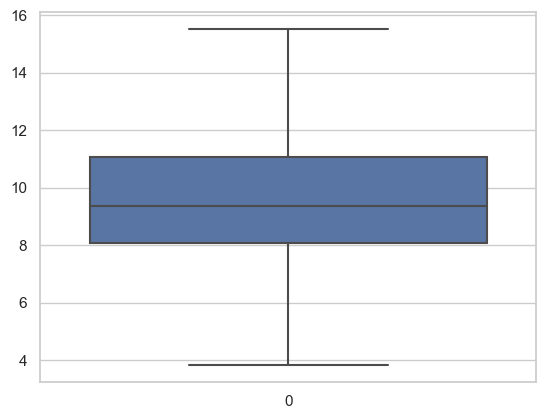

In [125]:
sns.boxplot(Y)

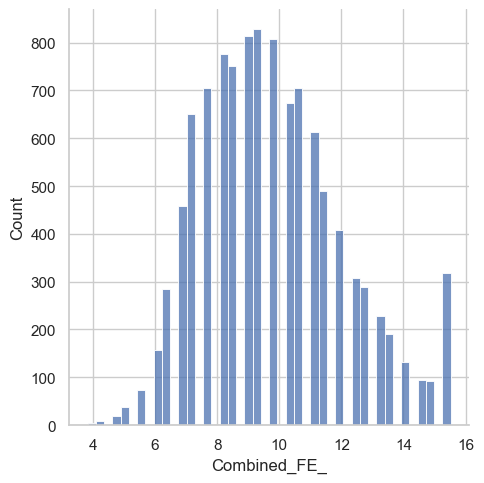

In [126]:
sns.displot(Y)

<Axes: xlabel='Combined_FE_', ylabel='Density'>

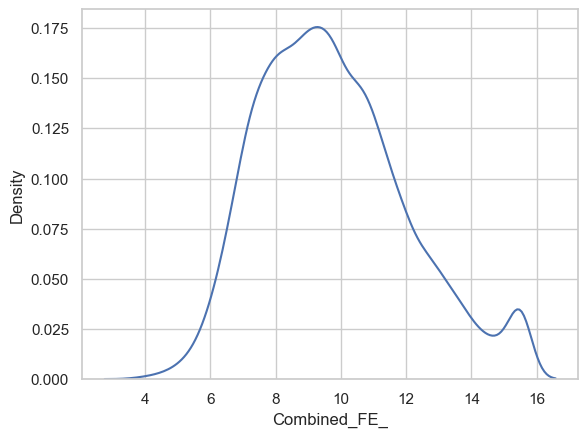

In [127]:
sns.kdeplot(Y)

#### Insight: The Performance was wow but let examine only train data to avoid data linkage

In [128]:
new_df_1 = df.drop(['Mfr_Name', 'Carline', 'City_FE', 'Highway_FE'], axis =1)
new_df_1

,Model_Year,Division,Engine_Displacement,Cylinder,Transmission,Combined_FE,Air_Aspiration_Method,Transmission_Desc,Gears,Drive_Desc,Fuel_Usage_Desc,Carline_Class_Desc
0,2015,Alfa Romeo,1.800000,4,Automatic,11.903900,Turbocharged,Automated Manual,6,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
1,2015,Aston Martin,6.000000,12,Automatic,5.952000,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
2,2015,Aston Martin,4.700000,8,Automatic,6.802200,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
3,2015,Aston Martin,4.700000,8,Manual,6.377100,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
4,2015,Aston Martin,4.700000,8,Automatic,6.802200,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
...,...,...,...,...,...,...,...,...,...,...,...,...
10917,2023,Chevrolet,2.700000,4,Automatic,7.652500,Turbocharged,Automatic,8,4-Wheel Drive,Regular Gasoline,Small Pick-up Trucks
10918,2023,GMC,2.700000,4,Automatic,8.077700,Turbocharged,Automatic,8,4-Wheel Drive,Regular Gasoline,Small Pick-up Trucks
10919,2023,GMC,2.700000,4,Automatic,7.652500,Turbocharged,Automatic,8,4-Wheel Drive,Regular Gasoline,Small Pick-up Trucks
10920,2023,RAM,5.700000,8,Automatic,7.227400,Naturally Aspirated,Automatic,8,"2-Wheel Drive, Rear",Gasoline Mid Grade,Standard Pick-up Trucks


In [129]:
x_new = new_df_1.drop('Combined_FE', axis =1)
y_new = new_df_1.Combined_FE

In [130]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size = 0.2, shuffle = True, random_state = 12)
train_cat_cols = [col for col in X_train_new.columns if X_train_new[col].dtype == 'O']
train_num_cols = [col for col in X_train_new.columns if X_train_new[col].dtype != 'O']

In [131]:
y_train_new.max()

25.0833

<Axes: >

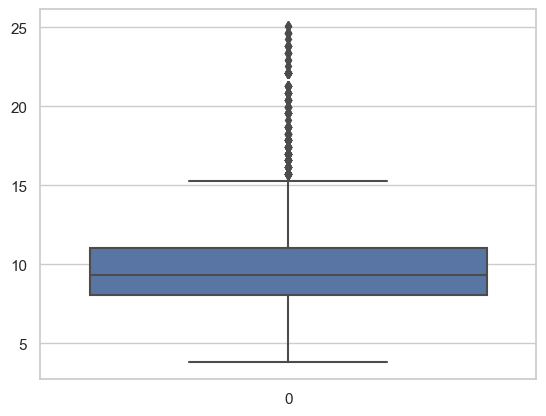

In [132]:
sns.boxplot(y_train_new)

In [133]:
Q1 = np.percentile(y_train_new, 25)
Q3 = np.percentile(y_train_new, 75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper =  Q3 + 1.5*IQR
outliers = (y_train_new < lower ) | (y_train_new > upper)
outliers

6267    False
7555    False
2400    False
2892    False
1453    False
        ...  
3714    False
7409    False
3325    False
9606    False
5787    False
Name: Combined_FE, Length: 8737, dtype: bool

In [134]:
lower, upper

(3.613850000000001, 15.517449999999998)

In [135]:
y_train_new = np.clip(y_train_new, lower, upper)

In [136]:
y_train_new

6267    8.927900
7555   11.903900
2400    7.652500
2892    8.502800
1453   11.053600
          ...   
3714   12.754200
7409    7.652500
3325    8.077700
9606    6.802200
5787    7.652500
Name: Combined_FE, Length: 8737, dtype: float64

In [137]:
y_train_new.max()

15.517449999999998

In [138]:
y_train_new.min()

3.8263

In [139]:
preprocess = ColumnTransformer([('num', StandardScaler(), train_num_cols), ('cat', OneHotEncoder(), train_cat_cols) ],
                                                       remainder = 'passthrough')

In [140]:
models = OrderedDict([
                      ("LinearRegression",         Pipeline([('prep', preprocess),  ('model', LinearRegression())])),

                      ("RidgeRegression",          Pipeline([('prep', preprocess),  ('model', Ridge())])),

                      ("LassoRegression",          Pipeline([('prep', preprocess),  ('model', Lasso())])),
    
                      ("DecisionTree",             Pipeline([('prep', preprocess), ('model', DecisionTreeRegressor())])),
    
                      ("RandomForest",             Pipeline([('prep', preprocess), ('model', RandomForestRegressor())])),
                      
                      ("Adaboost",                 Pipeline([('prep', preprocess), ('model', AdaBoostRegressor())])), 

                      ("Gradientboost",            Pipeline([('prep', preprocess), ('model', GradientBoostingRegressor())])),
    
                      ("XGBoost",                  Pipeline([('prep', preprocess), ('model', XGBRegressor())])),
    
                      ("Lightgbm",                 Pipeline([('prep', preprocess), ('model', LGBMRegressor())])),

                      ("Catboost",                 Pipeline([('prep', preprocess), ('model', CatBoostRegressor())]))
                                          
                                                                                                                      ])

In [141]:
X_train_new, X_test_new, y_train_new, y_test_new

(      Model_Year       Division  Engine_Displacement  Cylinder Transmission  \
 6267        2019           Jeep             3.200000         6    Automatic   
 7555        2021            BMW             2.000000         4    Automatic   
 2400        2016            GMC             5.300000         8    Automatic   
 2892        2017     Alfa Romeo             2.900000         6    Automatic   
 1453        2016          LEXUS             2.000000         4    Automatic   
 ...          ...            ...                  ...       ...          ...   
 3714        2018           Mini             1.500000         3    Automatic   
 7409        2020  Mercedes-Benz             4.000000         8    Automatic   
 3325        2017            RAM             3.600000         6    Automatic   
 9606        2022       Cadillac             6.200000         8    Automatic   
 5787        2019           Ford             5.000000         8    Automatic   
 
      Air_Aspiration_Method Transmissi

In [142]:
scores = {}
for (name, model) in models.items():
    model.fit(X_train_new, y_train_new)
    scores[name] =R2(model.predict(X_test_new), y_test_new)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 8737, number of used features: 83
[LightGBM] [Info] Start training from score 9.760990
Learning rate set to 0.057665
0:	learn: 2.1737424	total: 6.36ms	remaining: 6.36s
1:	learn: 2.0848198	total: 11.6ms	remaining: 5.78s
2:	learn: 2.0051397	total: 16.2ms	remaining: 5.38s
3:	learn: 1.9280839	total: 21ms	remaining: 5.23s
4:	learn: 1.8558534	total: 27.1ms	remaining: 5.38s
5:	learn: 1.7909582	total: 32.2ms	remaining: 5.33s
6:	learn: 1.7299548	total: 37.5ms	remaining: 5.32s
7:	learn: 1.6720525	total: 45.6ms	remaining: 5.65s
8:	learn: 1.6214934	total: 50.7ms	remaining: 5.58s
9:	learn: 1.5690148	total: 55.4ms	remaining: 5.49s
10:	learn: 1.5225196	total: 60.4ms	remaining: 5.43s
11:

In [143]:
accuracy =pd.DataFrame.from_dict(scores, columns=['R2'], dtype = "float", orient="index")
accuracy.sort_values(by="R2")

,R2
LassoRegression,-5.420318
Adaboost,0.600915
RidgeRegression,0.692242
LinearRegression,0.693290
Gradientboost,0.747944
Lightgbm,0.845223
Catboost,0.866925
XGBoost,0.873694
DecisionTree,0.875931
RandomForest,0.878474


In [144]:
model = Pipeline([('prep', preprocess), ('model', RandomForestRegressor())])
model.fit(X_train_new, y_train_new)
y_pred = model.predict(X_train_new)
y_pred

array([ 8.974672 , 11.8213269,  7.6525   , ...,  8.1196432,  6.8022   ,
        7.8473153])

In [145]:
R2(y_train_new, y_pred)

0.9866495304241872

In [146]:
y_predd = model.predict(X_test_new)

In [147]:
R2(y_test_new, y_predd)

0.9054901273936704

In [148]:
y_test_new_copy = y_test_new.copy()

In [149]:
y_test_df = pd.DataFrame(y_test_new_copy)

In [150]:
y_test_df['pred'] = y_predd

In [151]:
y_test_df.head(30)

,Combined_FE,pred
10544,8.077700,8.216400
351,11.903900,12.303956
9054,10.628500,10.919673
2931,9.778200,9.816469
8374,8.927900,9.054032
7830,13.179300,13.641640
3282,8.502800,8.555943
9942,8.077700,8.140094
3315,8.077700,8.073448
7304,8.077700,8.152800


In [152]:
pd.set_option('display.min_rows', 1000)

In [153]:
y_test_df[y_test_df['Combined_FE']>16]

,Combined_FE,pred
8980,21.257000,15.502572
341,19.131300,15.210831
9147,21.257000,15.481315
2020,17.855900,15.191162
632,17.005600,15.470688
7897,18.281000,15.517450
9094,18.281000,15.319354
10491,16.580500,15.196485
5374,19.556400,15.392768
4792,19.556400,15.517450


In [154]:
scores = {}
for (name, model) in models.items():
    model.fit(X_train_new, y_train_new)
    scores[name] =np.sqrt(MSE(model.predict(X_test_new), y_test_new))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 8737, number of used features: 83
[LightGBM] [Info] Start training from score 9.760990
Learning rate set to 0.057665
0:	learn: 2.1737424	total: 5.23ms	remaining: 5.23s
1:	learn: 2.0848198	total: 9.92ms	remaining: 4.95s
2:	learn: 2.0051397	total: 14.9ms	remaining: 4.96s
3:	learn: 1.9280839	total: 18.9ms	remaining: 4.71s
4:	learn: 1.8558534	total: 23.3ms	remaining: 4.63s
5:	learn: 1.7909582	total: 27.8ms	remaining: 4.61s
6:	learn: 1.7299548	total: 33.5ms	remaining: 4.75s
7:	learn: 1.6720525	total: 39.1ms	remaining: 4.85s
8:	learn: 1.6214934	total: 43.3ms	remaining: 4.77s
9:	learn: 1.5690148	total: 47.5ms	remaining: 4.7s
10:	learn: 1.5225196	total: 52.1ms	remaining: 4.68s
11

In [155]:
accuracy =pd.DataFrame.from_dict(scores, columns=['RMSE'], dtype = "float", orient="index")
accuracy.sort_values(by="RMSE")

,RMSE
RandomForest,0.789547
XGBoost,0.792118
DecisionTree,0.801459
Catboost,0.808678
Lightgbm,0.860598
Gradientboost,1.038315
LinearRegression,1.181996
RidgeRegression,1.182673
Adaboost,1.347803
LassoRegression,2.052897


#### After removing the outliers from the training data, the model performed exceptionally well on the training data but struggled to predict the test data effectively, achieving only an 88% accuracy rate. It's important to note that the outliers in the dataset resulted from some bigger values which are not errorneous. Therefore, We can used those numbers, since they are not errors.

In [156]:
x

,Model_Year,Division,Engine_Displacement,Cylinder,Transmission,Air_Aspiration_Method,Transmission_Desc,Gears,Drive_Desc,Fuel_Usage_Desc,Carline_Class_Desc
0,2015,Alfa Romeo,1.800000,4,Automatic,Turbocharged,Automated Manual,6,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
1,2015,Aston Martin,6.000000,12,Automatic,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
2,2015,Aston Martin,4.700000,8,Automatic,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
3,2015,Aston Martin,4.700000,8,Manual,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
4,2015,Aston Martin,4.700000,8,Automatic,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
5,2015,Aston Martin,4.700000,8,Manual,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
6,2015,Aston Martin,4.700000,8,Automatic,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
7,2015,Aston Martin,4.700000,8,Manual,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Premium Gasoline,Two Seaters
8,2015,Audi,4.200000,8,Automatic,Naturally Aspirated,Automated Manual-Selectable,7,All Wheel Drive,Premium Gasoline,Two Seaters
9,2015,Audi,4.200000,8,Manual,Naturally Aspirated,Manual,6,All Wheel Drive,Premium Gasoline,Two Seaters


In [157]:
y

0       11.903900
1        5.952000
2        6.802200
3        6.377100
4        6.802200
5        6.377100
6        6.802200
7        6.377100
8        7.227400
9        5.952000
10       6.802200
11       5.952000
12       7.227400
13       5.952000
14       6.802200
15       5.952000
16      11.053600
17       7.227400
18      11.053600
19      11.053600
20       8.502800
21       8.502800
22       4.251400
23       8.502800
24       6.802200
25       8.927900
26       7.652500
27       6.377100
28       6.377100
29       5.952000
           ...   
10892    7.227400
10893    7.227400
10894    7.652500
10895    7.652500
10896    6.802200
10897    7.227400
10898    6.802200
10899    9.353100
10900    8.927900
10901    7.227400
10902    7.227400
10903   14.879900
10904   14.879900
10905    8.502800
10906   10.628500
10907    9.353100
10908    8.502800
10909    8.502800
10910    9.353100
10911    8.927900
10912    6.802200
10913    6.802200
10914    8.502800
10915    8.502800
10916    8

In [158]:
X_train, X_test, y_train,y_test = train_test_split(x,y, test_size = 0.2, shuffle = True, random_state = 12)
train_cat_cols = [col for col in X_train.columns if X_train[col].dtype == 'O']
train_num_cols = [col for col in X_train.columns if X_train[col].dtype != 'O']

In [159]:
X_test.shape, y_test.shape

((2185, 11), (2185,))

In [160]:
preprocess = ColumnTransformer([('num', StandardScaler(), train_num_cols), ('cat', OneHotEncoder(), train_cat_cols) ],
                                                       remainder = 'passthrough')

In [161]:
models = OrderedDict([
                      ("LinearRegression",         Pipeline([('prep', preprocess),  ('model', LinearRegression())])),

                      ("RidgeRegression",          Pipeline([('prep', preprocess),  ('model', Ridge())])),

                      ("LassoRegression",          Pipeline([('prep', preprocess),  ('model', Lasso())])),
    
                      ("DecisionTree",             Pipeline([('prep', preprocess), ('model', DecisionTreeRegressor())])),
    
                      ("RandomForest",             Pipeline([('prep', preprocess), ('model', RandomForestRegressor())])),
                      
                      ("Adaboost",                 Pipeline([('prep', preprocess), ('model', AdaBoostRegressor())])), 

                      ("Gradientboost",            Pipeline([('prep', preprocess), ('model', GradientBoostingRegressor())])),
    
                      ("XGBoost",                  Pipeline([('prep', preprocess), ('model', XGBRegressor())])),
    
                      ("Lightgbm",                 Pipeline([('prep', preprocess), ('model', LGBMRegressor())])),

                      ("Catboost",                 Pipeline([('prep', preprocess), ('model', CatBoostRegressor())]))
                                          
                                                                                                                      ])

In [162]:
scores = {}
for (name, model) in models.items():
    model.fit(X_train,y_train)
    scores[name] =R2(model.predict(X_test), y_test)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 8737, number of used features: 83
[LightGBM] [Info] Start training from score 9.842694
Learning rate set to 0.057665
0:	learn: 2.4524924	total: 4.27ms	remaining: 4.27s
1:	learn: 2.3617522	total: 8.3ms	remaining: 4.14s
2:	learn: 2.2804667	total: 12.2ms	remaining: 4.06s
3:	learn: 2.2003924	total: 16.1ms	remaining: 4.01s
4:	learn: 2.1272921	total: 20.1ms	remaining: 4s
5:	learn: 2.0612446	total: 24.2ms	remaining: 4.01s
6:	learn: 1.9948125	total: 29ms	remaining: 4.12s
7:	learn: 1.9349791	total: 33.3ms	remaining: 4.13s
8:	learn: 1.8795114	total: 37.4ms	remaining: 4.12s
9:	learn: 1.8267029	total: 41.3ms	remaining: 4.09s
10:	learn: 1.7811100	total: 45.3ms	remaining: 4.07s
11:	lea

In [163]:
accuracy =pd.DataFrame.from_dict(scores, columns=['Accuracy_Score'], dtype = "float", orient="index")
accuracy.sort_values(by="Accuracy_Score", ascending=False)

,Accuracy_Score
RandomForest,0.946042
XGBoost,0.945360
Catboost,0.942292
DecisionTree,0.936037
Lightgbm,0.922518
Gradientboost,0.842805
LinearRegression,0.755733
RidgeRegression,0.755002
Adaboost,0.709576
LassoRegression,-4.097486


In [164]:
model =  Pipeline([('prep', preprocess), ('model', RandomForestRegressor())])
model.fit(X_train,y_train)
print('The accuracy of test data is {}'.format(R2(model.predict(X_test), y_test)))
print('The accuracy of train data is {}'.format(R2(model.predict(X_train), y_train)))

The accuracy of test data is 0.9448361060674156
The accuracy of train data is 0.9795787539385034


In [165]:
model =  Pipeline([('prep', preprocess), ('model', XGBRegressor())])
model.fit(X_train,y_train)
print('The accuracy of test data is {}'.format(R2(model.predict(X_test), y_test)))
print('The accuracy of train data is {}'.format(R2(model.predict(X_train), y_train)))

The accuracy of test data is 0.9453598246755702
The accuracy of train data is 0.9663174385354447


with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [166]:
pipe =  Pipeline([('prep', preprocess), ('model', XGBRegressor(n_estimators = 700))])

In [167]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
validation = cross_val_score(pipe, X_train, y_train, cv=cv, scoring = 'r2', n_jobs=-1)
print(f'Average cross validation accuracy is {validation.mean()} \nAverage cross validation RMSE is {validation.std()}')
#validation

Average cross validation accuracy is 0.9476104957583578 
Average cross validation RMSE is 0.010323641884928687


In [168]:
model = Pipeline([('prep', preprocess), ('model', XGBRegressor())])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([ 8.070645, 11.747192, 10.928908, ...,  9.738777,  9.929202,
        7.47756 ], dtype=float32)

In [186]:
y_test_df = pd.DataFrame(y_test)
y_test_df['pred'] = y_predd
y_test_df

,Combined_FE,pred
10544,8.077700,8.216400
351,11.903900,12.303956
9054,10.628500,10.919673
2931,9.778200,9.816469
8374,8.927900,9.054032
7830,13.179300,13.641640
3282,8.502800,8.555943
9942,8.077700,8.140094
3315,8.077700,8.073448
7304,8.077700,8.152800


<Axes: xlabel='importances', ylabel='features'>

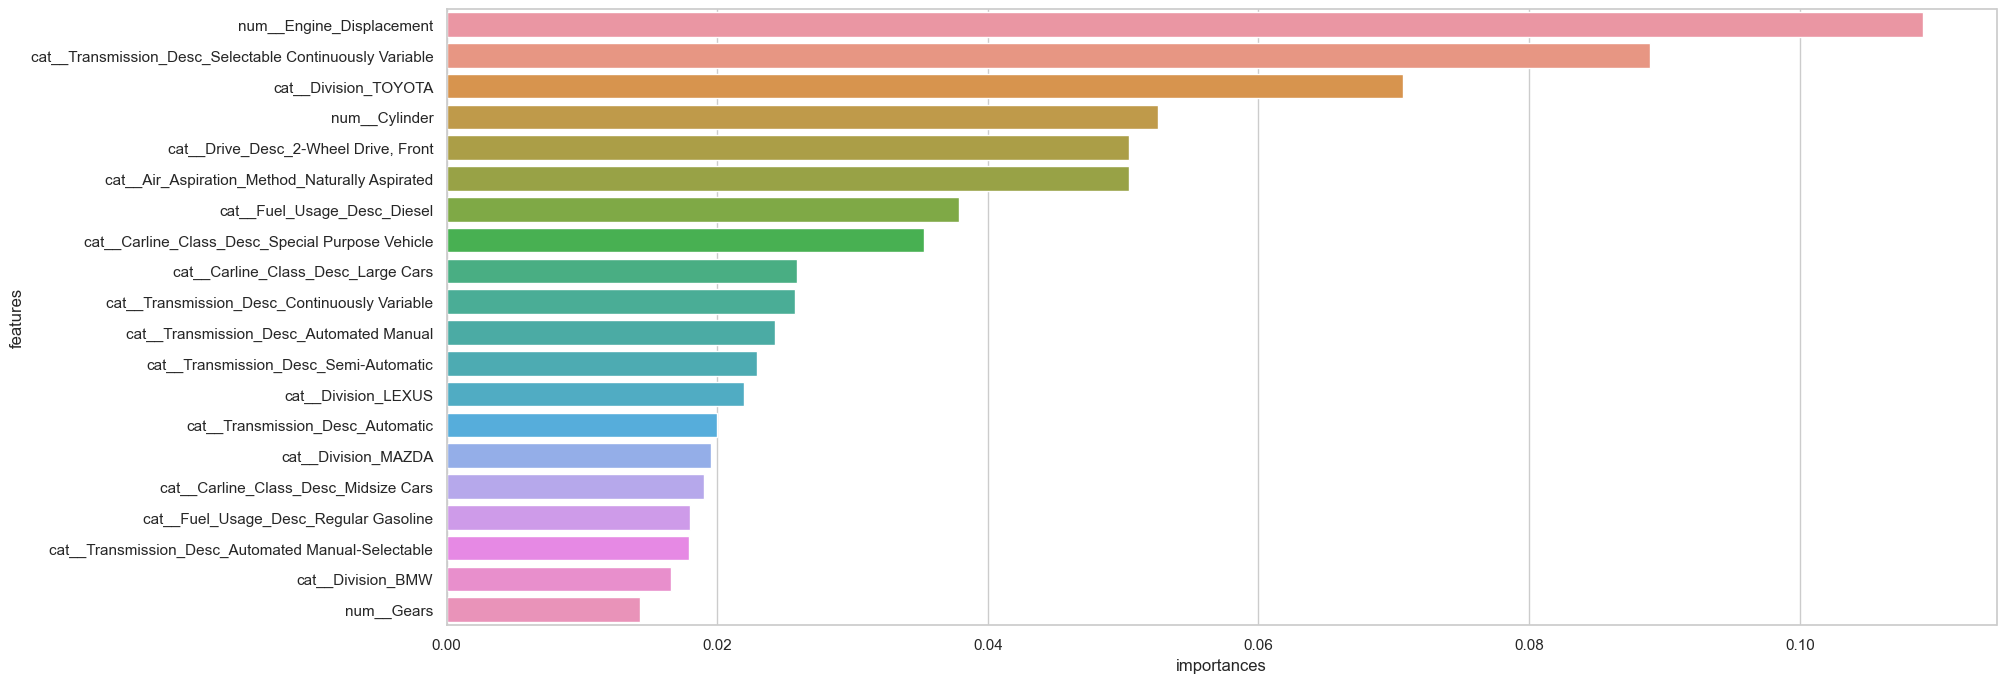

In [187]:
features_importances = pd.DataFrame(model.named_steps['prep'].get_feature_names_out(), columns = ['features'])
features_importances['importances'] = pd.DataFrame(model.named_steps['model'].feature_importances_)
features_importances.sort_values(by = 'importances', ascending = False, inplace = True)
features_importance = features_importances.head(20)
plt.figure(figsize= (20, 8))
sns.barplot(data = features_importance, y = 'features', x = 'importances')

import pickle
with open('XGBR_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
#predictions

In [180]:
aj = X_test[X_test['Division'] == 'KIA']
aj

,Model_Year,Division,Engine_Displacement,Cylinder,Transmission,Air_Aspiration_Method,Transmission_Desc,Gears,Drive_Desc,Fuel_Usage_Desc,Carline_Class_Desc
8374,2021,KIA,2.000000,4,Automatic,Turbocharged,Semi-Automatic,6,All Wheel Drive,Regular Gasoline,Small SUV
6838,2020,KIA,2.400000,4,Automatic,Naturally Aspirated,Semi-Automatic,6,"2-Wheel Drive, Front",Regular Gasoline,Large Cars
4458,2018,KIA,3.300000,6,Automatic,Turbocharged,Semi-Automatic,8,"2-Wheel Drive, Rear",Premium Gasoline,Midsize Cars
9147,2022,KIA,1.600000,4,Automatic,Naturally Aspirated,Automated Manual-Selectable,6,"2-Wheel Drive, Front",Regular Gasoline,Small Station Wagons
1060,2015,KIA,3.300000,6,Automatic,Naturally Aspirated,Automatic,6,All Wheel Drive,Regular Gasoline,Small SUV
7839,2021,KIA,1.600000,4,Manual,Turbocharged,Manual,6,"2-Wheel Drive, Front",Regular Gasoline,Midsize Cars
2198,2016,KIA,2.400000,4,Automatic,Naturally Aspirated,Semi-Automatic,6,"2-Wheel Drive, Front",Regular Gasoline,Small SUV
6708,2020,KIA,3.300000,6,Automatic,Turbocharged,Semi-Automatic,8,All Wheel Drive,Premium Gasoline,Midsize Cars
3205,2017,KIA,1.600000,4,Automatic,Naturally Aspirated,Semi-Automatic,6,"2-Wheel Drive, Front",Regular Gasoline,Small Station Wagons
10170,2023,KIA,1.600000,4,Manual,Turbocharged,Manual,6,"2-Wheel Drive, Front",Regular Gasoline,Midsize Cars


In [181]:
model.predict(aj)

array([ 9.591532 , 12.099174 ,  8.808015 , 20.265152 ,  8.537578 ,
       11.9829445, 10.409216 ,  8.558093 , 12.094999 , 12.390475 ,
       12.603921 , 10.007215 , 15.664378 ,  9.409842 ,  8.506019 ,
       12.221575 ,  9.326586 , 12.672871 ,  9.054097 , 12.366659 ,
        9.65156  , 13.034866 ,  8.81144  , 12.863401 , 11.025011 ,
        9.764798 , 10.751282 , 10.082753 , 19.535479 ,  9.277714 ,
       11.902432 ,  9.606138 , 10.851252 , 12.038295 , 12.796341 ,
        9.745624 ,  9.057748 ,  9.764798 , 12.238049 , 11.116948 ,
       13.158625 , 12.311465 , 20.265152 ,  9.616334 ,  9.713267 ,
        9.400179 , 11.5880995, 20.265152 , 19.290905 , 13.020187 ,
       11.880831 , 12.047178 , 18.079622 ,  9.7962675, 13.04903  ,
        9.438566 , 10.654695 ,  8.728919 , 12.923994 , 12.445889 ,
       10.39902  , 19.347408 ,  9.838391 ,  9.35831  ], dtype=float32)

In [191]:
y_test[8374], y_test[6838], y_test[4458], y_test[9147]

(8.9279, 11.4788, 8.5028, 21.257)

## The final model used is Extreme Gradient boosting, having provided highest R squared value